In [1]:
import pandas as pd
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from joblib import dump, load
import joblib

## 0. DataFrame

In [2]:
football_df = pd.read_csv('data/all_data_with_elo.csv', low_memory = False)
football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
0,0,D1,2003/8/1,Bayern Munich,Ein Frankfurt,3,1,H,17.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859.379272,1593.249268
1,1,F1,2003/8/1,Lille,Lyon,1,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.968018,1726.539795
2,2,F1,2003/8/2,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003/8/2,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003/8/2,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2025/5/4,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2025/5/4,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2025/5/5,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2025/5/5,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


In [3]:
# 提前6个月，用来划分赛季
# 将字符串转换为日期类型，指定日期格式
football_df['Date'] = pd.to_datetime(football_df['Date'], format='%Y/%m/%d')
football_df['Date'] = football_df['Date'] - pd.DateOffset(months=6)
football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
0,0,D1,2003-02-01,Bayern Munich,Ein Frankfurt,3,1,H,17.0,6.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1859.379272,1593.249268
1,1,F1,2003-02-01,Lille,Lyon,1,0,H,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1612.968018,1726.539795
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


## 1. Descriptive Statistics 

**1.1 DataFrame Shape**

In [4]:
# no. rows and no. cols
football_df.shape

(39049, 28)

In [5]:
# feature names
print(football_df.columns.tolist())

['Unnamed: 0', 'Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'HS', 'AS', 'HST', 'AST', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'AHCh', 'B365CAHH', 'B365CAHA', 'B365>2.5', 'B365<2.5', 'HomeTeamELO', 'AwayTeamELO']


**1.2 NaN Values**

In [6]:
football_df.isnull().sum()

Unnamed: 0         0
Div                0
Date               0
HomeTeam           0
AwayTeam           0
FTHG               0
FTAG               0
FTR                0
HS              1762
AS              1762
HST             2568
AST             2568
B365H             49
B365D             49
B365A             49
WHH              863
WHD              863
WHA              863
AHh              262
B365AHH          277
B365AHA          277
AHCh           28479
B365CAHH       28481
B365CAHA       28481
B365>2.5       26335
B365<2.5       26335
HomeTeamELO      125
AwayTeamELO      126
dtype: int64

In [7]:
# total elements in 
football_df.size

1093372

In [8]:
# total number of NaN
football_df.size - football_df.count().sum()

150574

In [9]:
# total number of NaN rows
football_df.isnull().any(axis = 1).sum()

28795

In [10]:
# total number of NaN columns
football_df.isnull().any(axis = 0).sum()

20

## 2. Data Wrangling and Feature Transformation/Development

### 2.1 NaN Handling

`TODO`: drop NaN values along columns: {Date, Home Team, Away Team, FTR} <br>
`TODO`: identify betting odds w/ most available data

In [11]:
# 当前方法仅提取这几个字段 分区 日期 主队 客队 full-time-result 三家机构的胜平负 主队ELO评分 客队ELO评分
# nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTR', 'B365H', 'B365D', 'B365A', 
#             'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']
# nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'B365H', 'B365D', 'B365A', 'WHH', 'WHD', 'WHA', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']
nan_mask = ['Div', 'Date', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR', 'B365H', 'B365D', 'B365A', 'AHh', 'B365AHH', 'B365AHA', 'HomeTeamELO', 'AwayTeamELO']

In [12]:
nan_football_df = football_df.dropna(subset = nan_mask)
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHh,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,-0.75,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,0.00,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,-0.75,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,-0.75,2.025,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,-0.75,1.900,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.25,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075


In [13]:
conditions = [
    nan_football_df['AHh'] >= 2.5,         # AHh >= 2.75
    (nan_football_df['AHh'] >= 1.5) & (nan_football_df['AHh'] <= 2.25),  # 1.75 < AHh <= 2.75
    (nan_football_df['AHh'] >= 0.25) & (nan_football_df['AHh'] <= 1.25),  # 0.25 < AHh <= 1.75
    nan_football_df['AHh'] == 0,            # AHh == 0
    (nan_football_df['AHh'] >= -1.25) & (nan_football_df['AHh'] <= -0.25),  # -1.75 < AHh <= -0.25
    (nan_football_df['AHh'] >= -2.25) & (nan_football_df['AHh'] <= -1.5),  # -2.75 < AHh <= -1.75
    nan_football_df['AHh'] <= -2.5
]
# easy_conditions = [
#     nan_football_df['AHh'] <= -0.25,
#     nan_football_df['AHh'] == 0,
#     nan_football_df['AHh'] >= 0.25,
# ]
labels = [3, 2, 1, 0, -1, -2, -3]
# easy_labels = [-1, 0, 1]

nan_football_df['balance_val'] = np.select(conditions, labels)
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHH,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,2.050,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.925,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,1.800,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,2.025,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,1.900,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,2.100,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,1.750,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.930,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.800,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1


In [14]:
nan_football_df['asia_final_result'] = nan_football_df['FTHG'] - nan_football_df['FTAG'] + nan_football_df['balance_val']
nan_football_df

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [15]:
nan_football_df_noNone = nan_football_df.dropna(subset = nan_mask)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
2,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
3,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
4,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
5,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
7,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39044,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
39045,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
39046,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
39047,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [16]:
nan_football_df_noNone.reset_index(inplace=True, drop=True)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,B365AHA,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,1.850,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,1.975,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,2.100,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,1.875,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,2.000,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,1.700,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,2.050,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,1.850,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,1.980,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0


In [17]:
conditions = [
    nan_football_df_noNone['asia_final_result'] < 0,
    nan_football_df_noNone['asia_final_result'] == 0,
    nan_football_df_noNone['asia_final_result'] > 0,
]
easy_labels = [0, 1, 2]

nan_football_df_noNone['easy_label'] = np.select(conditions, easy_labels)
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result,easy_label
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2,0
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1,0
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4,0
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4,0
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1,0
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1,0
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1,0
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0,1


In [18]:
# resize shape
football_df.shape[0] - nan_football_df_noNone.shape[0]

537

### 2.2 Feature Encoding <br>
* $\phi(Date)$ $\Rightarrow$ one column for *year*, second column for *month*, third column for *day of year*
* One hot encode Division, Home and Away Teams
* Label encode Full Time Result (Win/Draw/Loss)

In [19]:
feats = nan_mask
feats.append('easy_label')
feats.append('balance_val')

In [20]:
nan_football_df_noNone

,Unnamed: 0,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,HS,AS,...,AHCh,B365CAHH,B365CAHA,B365>2.5,B365<2.5,HomeTeamELO,AwayTeamELO,balance_val,asia_final_result,easy_label
0,2,F1,2003-02-02,Auxerre,Nice,1,2,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1702.604858,1611.196045,-1,-2,0
1,3,F1,2003-02-02,Guingamp,Marseille,0,1,A,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1685.016113,1665.625732,0,-1,0
2,4,D1,2003-02-02,Hamburg,Hannover,0,3,A,10.0,16.0,...,NaN,NaN,NaN,NaN,NaN,1718.566284,1649.805298,-1,-4,0
3,5,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,23.0,19.0,...,NaN,NaN,NaN,NaN,NaN,1719.916748,1692.120972,-1,-4,0
4,7,F1,2003-02-02,Lens,Le Mans,0,0,D,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1697.354004,1539.958130,-1,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,39044,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,12.0,3.0,...,-0.25,2.14,1.77,2.63,1.50,1683.467285,1797.882568,-1,-1,0
38508,39045,E0,2024-11-04,West Ham,Tottenham,1,1,D,11.0,7.0,...,-0.50,1.84,2.06,1.57,2.38,1729.567261,1790.107788,-1,-1,0
38509,39046,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,20.0,12.0,...,-0.25,1.87,2.03,2.01,1.89,1807.064453,1802.088501,-1,-1,0
38510,39047,I1,2024-11-05,Genoa,Milan,1,2,A,11.0,10.0,...,0.75,1.92,1.98,1.99,1.91,1656.094849,1783.127075,1,0,1


In [21]:
learning_df_feat = nan_football_df_noNone.copy()[feats]
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,balance_val
0,F1,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,0,-1
1,F1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0
2,D1,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,0,-1
3,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,0,-1
4,F1,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,0,-1
38508,E0,2024-11-04,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,0,-1
38509,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,0,-1
38510,I1,2024-11-05,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,1,1


In [22]:
learning_df_feat.reset_index(inplace=True, drop=True)
# 保存文件作为历史文件
learning_df_feat.to_csv('.\prediction_data/history_data_FTR.csv', index=False, encoding='utf-8-sig')
learning_df_feat

,Div,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,easy_label,balance_val
0,F1,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,0,-1
1,F1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0
2,D1,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,0,-1
3,D1,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,0,-1
4,F1,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,0,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,SP1,2024-11-04,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,0,-1
38508,E0,2024-11-04,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,0,-1
38509,E0,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,0,-1
38510,I1,2024-11-05,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,1,1


**2.2.1 Division and Home/Away Team Encoding**

In [23]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

div_encoder = OneHotEncoder()
home_encoder = OneHotEncoder()
away_encoder = OneHotEncoder()

In [24]:
onehot_div = div_encoder.fit_transform(learning_df_feat.Div.values.reshape(-1,1)).toarray().astype(int)
onehot_div_df = pd.DataFrame(onehot_div, columns = ["Div "+str(int(i)) for i in range(onehot_div.shape[1])])

onehot_home = home_encoder.fit_transform(learning_df_feat.HomeTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_home_df = pd.DataFrame(onehot_home, columns = ['HomeTeam ' + str(int(i)) for i in np.arange(onehot_home.shape[1])])

onehot_away = away_encoder.fit_transform(learning_df_feat.AwayTeam.values.reshape(-1,1)).toarray().astype(int)
onehot_away_df = pd.DataFrame(onehot_away, columns = ['AwayTeam ' + str(int(i)) for i in np.arange(onehot_away.shape[1])])

In [25]:
# 保存编码器到本地
joblib.dump(div_encoder, 'div_encoder_FTR.pkl')
joblib.dump(home_encoder, 'home_encoder_FTR.pkl')
joblib.dump(away_encoder, 'away_encoder_FTR.pkl')

['away_encoder_FTR.pkl']

In [26]:
learning_df_div = pd.concat([learning_df_feat, onehot_div_df, onehot_home_df, onehot_away_df], axis = 1)
learning_df_div.drop(columns = ['Div'], inplace = True)

In [27]:
learning_df_div

,Date,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,...,AwayTeam 197,AwayTeam 198,AwayTeam 199,AwayTeam 200,AwayTeam 201,AwayTeam 202,AwayTeam 203,AwayTeam 204,AwayTeam 205,AwayTeam 206
0,2003-02-02,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,...,0,0,0,0,0,0,0,0,0,0
1,2003-02-02,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,...,0,0,0,0,0,0,0,0,0,0
2,2003-02-02,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,...,0,0,0,0,0,0,0,0,0,0
3,2003-02-02,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,...,0,0,1,0,0,0,0,0,0,0
4,2003-02-02,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,2024-11-04,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,...,0,0,0,0,0,0,0,0,0,0
38508,2024-11-04,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,...,0,0,0,0,0,0,0,0,0,0
38509,2024-11-05,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,...,0,0,0,0,0,0,0,0,0,0
38510,2024-11-05,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,...,0,0,0,0,0,0,0,0,0,0


**2.2.2 Full Time Result Encoding**

In [28]:
target_encoder = LabelEncoder()
# learning_df_div['Result'] = target_encoder.fit_transform(learning_df_div.easy_label) 
learning_df_div['Result'] = target_encoder.fit_transform(learning_df_div.FTR)

In [29]:
joblib.dump(target_encoder, 'target_encoder_FTR.pkl')

['target_encoder_FTR.pkl']

**2.2.3 Date Encoding**

In [30]:
learning_df_div['Year'] = pd.DatetimeIndex(learning_df_div.Date).year

learning_df_div['Month'] = pd.DatetimeIndex(learning_df_div.Date).month
learning_df_div['Sin_Month'] = np.sin(2*np.pi*learning_df_div.Month/12)
learning_df_div['Cos_Month'] = np.cos(2*np.pi*learning_df_div.Month/12)

learning_df_div['DayofYear'] = pd.DatetimeIndex(learning_df_div.Date).dayofyear
learning_df_div['Sin_Day'] = np.sin(2*np.pi*learning_df_div.DayofYear/365)
learning_df_div['Cos_Day'] = np.cos(2*np.pi*learning_df_div.DayofYear/365)

# 注意 inplace是在原始frame修改，返回值是Nonetype
# learning_df = learning_df_div.drop(columns = ['Date','Month'], inplace = True)
# learning_df = learning_df_div.drop(columns = ['Date','Month'])
learning_df = learning_df_div.drop(columns = ['Date'])
# learning_df.drop(columns = ['Date'], inplace = True)

In [31]:
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,FTR,B365H,B365D,B365A,AHh,B365AHH,...,AwayTeam 205,AwayTeam 206,Result,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day
0,Auxerre,Nice,1,2,A,1.727,3.100,4.500,-0.75,2.050,...,0,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942
1,Guingamp,Marseille,0,1,A,2.500,2.875,2.625,0.00,1.925,...,0,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942
2,Hamburg,Hannover,0,3,A,1.571,3.500,5.000,-0.75,1.800,...,0,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942
3,Hertha,Werder Bremen,0,3,A,1.833,3.200,3.750,-0.75,2.025,...,0,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942
4,Lens,Le Mans,0,0,D,1.571,3.250,5.500,-0.75,1.900,...,0,0,1,2003,2,0.866025,0.500000,33,0.538005,0.842942
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,Sociedad,Ath Bilbao,0,0,D,2.550,3.000,3.000,-0.25,2.100,...,0,0,1,2024,11,-0.500000,0.866025,309,-0.821477,0.570242
38508,West Ham,Tottenham,1,1,D,2.100,3.700,3.250,-0.25,1.750,...,0,0,1,2024,11,-0.500000,0.866025,309,-0.821477,0.570242
38509,Crystal Palace,Nott'm Forest,1,1,D,2.250,3.400,3.200,-0.25,1.930,...,0,0,1,2024,11,-0.500000,0.866025,310,-0.811539,0.584298
38510,Genoa,Milan,1,2,A,4.750,3.700,1.800,0.75,1.800,...,0,0,0,2024,11,-0.500000,0.866025,310,-0.811539,0.584298


In [32]:
# For Test


### 2.3 Feature Engineering <br>
* $\phi(x)$ feature transformation $\Rightarrow$ last match result, win/loss streak to date, wins to season date
* $\phi(x)$ feature engineering $\Rightarrow$ average the home, away, and draw odds

**2.3.1 Last Match Result** <br>
Indicate the result from the last match played between both teams

# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        last_match_result = matchup_df.easy_label.shift(1, fill_value='Na')
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    return df

In [33]:
def compute_last_n_matches(df, n=5):
    unique_matchups = list(set(zip(df.HomeTeam, df.AwayTeam)))
    df['Last 5 Match Results'] = np.nan  # 新增一列用于存储过去 5 场比赛的结果
    
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        
        # 获取过去 n 场比赛的结果
        # last_n_results = [matchup_df.FTR.shift(i, fill_value='Na') for i in range(1, n+1)]
        last_n_results = [matchup_df.easy_label.shift(i, fill_value='Na') for i in range(1, n+1)]
        
        # 将计算得到的过去 n 场比赛的结果合并为一个字符串或列表，取决于需求
        # 这里使用字符串形式：'result1/result2/...'
        matchup_df['Last 5 Match Results'] = pd.DataFrame(last_n_results).T.apply(lambda x: '/'.join(x), axis=1)
        
        # 将计算得到的结果更新回原始 df 中
        df.loc[matchup_df.index, 'Last 5 Match Results'] = matchup_df['Last 5 Match Results']
    
    # 对 Last 5 Match Results 列进行标签编码
    lmr_encoder = LabelEncoder()
    df['Last 5 Match Results'] = lmr_encoder.fit_transform(df['Last 5 Match Results'])
    
    # 删除原始的 FTR 列
    df.drop(columns=['easy_label'], inplace=True)
    
    return df


In [34]:
# 定义一个函数来计算两队之间上一场比赛的结果
def compute_last_matches(df):
    
    unique_matchups = list(set((list(zip(df.HomeTeam, df.AwayTeam)))))
    df['Last Match Result'] = np.nan
    for home, away in unique_matchups:
        matchup_df = df[(df.HomeTeam == home) & (df.AwayTeam == away)]
        # 使用 shift(1) 方法将 FTR（全场比赛结果）列中的数据向下移动一行，这样每行的 last_match_result 将对应于这两队之前的一场比赛的结果。fill_value='Na' 确保了数据移动后空出的位置填充为 'Na'。
        # last_match_result = matchup_df.FTR.shift(1, fill_value='Na')
        # 因为easy_label 不适合作为上次比较结果
        last_match_result = matchup_df.Result.shift(1, fill_value=3)
        # last_match_result = matchup_df.Result_FTR.shift(1, fill_value=3)
        df.loc[matchup_df.index, 'Last Match Result'] = last_match_result
        
    lmr_encoder = LabelEncoder()
    df['Last Match Result'] = lmr_encoder.fit_transform(df['Last Match Result'])
    df.drop(columns = ['easy_label'], inplace = True)
    df.drop(columns = ['FTR'], inplace = True)
    return df
learning_df = compute_last_matches(learning_df)
# learning_df.drop(columns = ['FTR'], inplace = True)

In [35]:
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,AHh,B365AHH,B365AHA,...,AwayTeam 206,Result,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day,Last Match Result
0,Auxerre,Nice,1,2,1.727,3.100,4.500,-0.75,2.050,1.850,...,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942,3
1,Guingamp,Marseille,0,1,2.500,2.875,2.625,0.00,1.925,1.975,...,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942,3
2,Hamburg,Hannover,0,3,1.571,3.500,5.000,-0.75,1.800,2.100,...,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942,3
3,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,-0.75,2.025,1.875,...,0,0,2003,2,0.866025,0.500000,33,0.538005,0.842942,3
4,Lens,Le Mans,0,0,1.571,3.250,5.500,-0.75,1.900,2.000,...,0,1,2003,2,0.866025,0.500000,33,0.538005,0.842942,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,Sociedad,Ath Bilbao,0,0,2.550,3.000,3.000,-0.25,2.100,1.700,...,0,1,2024,11,-0.500000,0.866025,309,-0.821477,0.570242,2
38508,West Ham,Tottenham,1,1,2.100,3.700,3.250,-0.25,1.750,2.050,...,0,1,2024,11,-0.500000,0.866025,309,-0.821477,0.570242,1
38509,Crystal Palace,Nott'm Forest,1,1,2.250,3.400,3.200,-0.25,1.930,1.850,...,0,1,2024,11,-0.500000,0.866025,310,-0.811539,0.584298,1
38510,Genoa,Milan,1,2,4.750,3.700,1.800,0.75,1.800,1.980,...,0,0,2024,11,-0.500000,0.866025,310,-0.811539,0.584298,0


**2.3.2 Home and Away Win/Loss Streak** <br>
Important note about this feature: the win/loss streak is the teams *home* and *away* win streak, *not* its ***consecutive*** win/loss streak.

In [36]:
# https://stackoverflow.com/questions/52976336/compute-winning-streak-with-pandas
# https://joshdevlin.com/blog/calculate-streaks-in-pandas/

In [37]:
def compute_winstreak(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0])  
        year_df['HomeWinStreak'] = None
        year_df['AwayWinStreak'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        # if year > 2024:
        #     # 将 AwayWin = 3 当作 0 来处理，保持计算连胜记录
        #     year_df['HomeWin'] = year_df['HomeWin'].replace(3, 0)
        #     year_df['AwayWin'] = year_df['AwayWin'].replace(3, 0)
        
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))
            
            home_win_streak = 0  # 初始化连胜场数
            streaks = []  # 用来存储每场比赛的连续胜利次数
            for idx, row in team_df.iterrows():
                streaks.append(home_win_streak)  # 当前场次视为未进行，记录上一场的连胜次数
                # 计算当前场次的连胜，忽略当前比赛的胜负
                if row['HomeWin'] == 1:  # 如果上一场比赛主队赢
                    home_win_streak += 1  # 连胜场数递增
                else:  # 如果上一场比赛主队输了
                    home_win_streak = 0  # 连胜场数重置为 0
            # 将计算出的连胜场数赋值到 DataFrame 中
            team_df['HomeWinStreak'] = streaks
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'HomeWinStreak'] = team_df.HomeWinStreak
            
            # team_grouper = (team_df.HomeWin != team_df.HomeWin.shift()).cumsum()
            # team_df['HomeWinStreak'] = team_df[['HomeWin']].groupby(team_grouper).cumsum()
            # team_df.loc[team_df.HomeWinStreak >0, 'HomeWinStreak'] -= 1
            # year_df.loc[team_df.index, 'HomeWinStreak'] = team_df.HomeWinStreak
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            away_win_streak = 0  # 初始化连胜场数
            streaks = []  # 用来存储每场比赛的连续胜利次数
            for idx, row in team_df.iterrows():
                streaks.append(away_win_streak)  # 当前场次视为未进行，记录上一场的连胜次数
                # 计算当前场次的连胜，忽略当前比赛的胜负
                if row['AwayWin'] == 1:  # 如果上一场比赛主队赢
                    away_win_streak += 1  # 连胜场数递增
                else:  # 如果上一场比赛主队输了
                    away_win_streak = 0  # 连胜场数重置为 0
            # 将计算出的连胜场数赋值到 DataFrame 中
            team_df['AwayWinStreak'] = streaks
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'AwayWinStreak'] = team_df.AwayWinStreak
            
            # team_grouper = (team_df.AwayWin != team_df.AwayWin.shift()).cumsum()
            # team_df['AwayWinStreak'] = team_df[['AwayWin']].groupby(team_grouper).cumsum()
            # team_df.loc[team_df.AwayWinStreak >0, 'AwayWinStreak'] -= 1
            # year_df.loc[team_df.index, 'AwayWinStreak'] = team_df.AwayWinStreak
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin'])#,'DayofYear'])

In [38]:
learning_df = compute_winstreak(learning_df)
learning_df

,HomeTeam,AwayTeam,FTHG,FTAG,B365H,B365D,B365A,AHh,B365AHH,B365AHA,...,Year,Month,Sin_Month,Cos_Month,DayofYear,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak
0,Auxerre,Nice,1,2,1.727,3.100,4.500,-0.75,2.050,1.850,...,2003,2,0.866025,0.500000,33,0.538005,0.842942,3,0,0
1,Guingamp,Marseille,0,1,2.500,2.875,2.625,0.00,1.925,1.975,...,2003,2,0.866025,0.500000,33,0.538005,0.842942,3,0,0
2,Hamburg,Hannover,0,3,1.571,3.500,5.000,-0.75,1.800,2.100,...,2003,2,0.866025,0.500000,33,0.538005,0.842942,3,0,0
3,Hertha,Werder Bremen,0,3,1.833,3.200,3.750,-0.75,2.025,1.875,...,2003,2,0.866025,0.500000,33,0.538005,0.842942,3,0,0
4,Lens,Le Mans,0,0,1.571,3.250,5.500,-0.75,1.900,2.000,...,2003,2,0.866025,0.500000,33,0.538005,0.842942,3,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,Sociedad,Ath Bilbao,0,0,2.550,3.000,3.000,-0.25,2.100,1.700,...,2024,11,-0.500000,0.866025,309,-0.821477,0.570242,2,0,0
38508,West Ham,Tottenham,1,1,2.100,3.700,3.250,-0.25,1.750,2.050,...,2024,11,-0.500000,0.866025,309,-0.821477,0.570242,1,0,0
38509,Crystal Palace,Nott'm Forest,1,1,2.250,3.400,3.200,-0.25,1.930,1.850,...,2024,11,-0.500000,0.866025,310,-0.811539,0.584298,1,0,1
38510,Genoa,Milan,1,2,4.750,3.700,1.800,0.75,1.800,1.980,...,2024,11,-0.500000,0.866025,310,-0.811539,0.584298,0,0,2


**2.3.4 Season Home/Away Wins to Date** <br>
Indicate the number of wins for a team as home and away to date within current season

toy = learning_df[(learning_df.Year == 2010) & (learning_df.HomeTeam == 'Barcelona')][['HomeTeam', 'AwayTeam', 'Result']]
toy['HomeWin'] = toy.Result.replace([0, 1, 2], [0, 0, 1])
toy['HomeWinsToDate'] = toy.HomeWin.cumsum()

In [39]:
def compute_winstodate(df):
    
    years = df.Year.unique()
    df_lst = []    
    for year in years:
        
        year_df = df[df.Year == year]
        year_df['HomeWin'] = year_df.Result.replace([0, 1, 2], [0, 0, 1])
        year_df['AwayWin'] = year_df.Result.replace([0, 1, 2], [1, 0, 0]) 
        # year_df['HomeWin'] = year_df.Result_FTR.replace([0, 1, 2], [0, 0, 1])
        # year_df['AwayWin'] = year_df.Result_FTR.replace([0, 1, 2], [1, 0, 0])
        year_df['HomeWinsToDate'] = None
        year_df['AwayWinsToDate'] = None
        
        hometeams = year_df.HomeTeam.unique()
        awayteams = year_df.AwayTeam.unique()
        # if year > 2024:
        #     # 将 AwayWin = 3 当作 0 来处理，保持计算连胜记录
        #     year_df['HomeWin'] = year_df['HomeWin'].replace(3, 0)
        #     year_df['AwayWin'] = year_df['AwayWin'].replace(3, 0)
            
        for team in hometeams:
            team_df = year_df[(year_df.HomeTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))

            # 计算截至当前场次之前的累计胜利次数（不包含当前场次）
            team_df['HomeWinsToDate'] = team_df.HomeWin.shift(1).cumsum()
            # 填充 NaN 值为 0，因为第一场比赛没有上一场比赛的数据
            team_df['HomeWinsToDate'].fillna(0, inplace=True)
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'HomeWinsToDate'] = team_df.HomeWinsToDate
    
            # team_df['HomeWinsToDate'] = team_df.HomeWin.cumsum()
            # year_df.loc[team_df.index, 'HomeWinsToDate'] = team_df.HomeWinsToDate
            
        for team in awayteams:
            team_df = year_df[(year_df.AwayTeam == team)]
            team_df = team_df.sort_values(['Year', 'DayofYear'], ascending = (True, True))
            
            # 计算截至当前场次之前的累计胜利次数（不包含当前场次）
            team_df['AwayWinsToDate'] = team_df.AwayWin.shift(1).cumsum()
            # 填充 NaN 值为 0，因为第一场比赛没有上一场比赛的数据
            team_df['AwayWinsToDate'].fillna(0, inplace=True)
            # 将更新后的数据回写到原 DataFrame
            year_df.loc[team_df.index, 'AwayWinsToDate'] = team_df.AwayWinsToDate
            
            # team_df['AwayWinsToDate'] = team_df.AwayWin.cumsum()
            # year_df.loc[team_df.index, 'AwayWinsToDate'] = team_df.AwayWinsToDate
            
        df_lst.append(year_df)
        
    return pd.concat(df_lst, axis = 0).drop(columns = ['HomeWin', 'AwayWin','DayofYear'])

In [40]:
learning_df = compute_winstodate(learning_df)
learning_df.drop(columns = ['HomeTeam', 'AwayTeam'], inplace = True)

In [41]:
# learning_df
learning_df

,FTHG,FTAG,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1,2,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
1,0,1,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
2,0,3,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
3,0,3,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
4,0,0,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,0,0,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,...,11,-0.500000,0.866025,-0.821477,0.570242,2,0,0,7.0,6.0
38508,1,1,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,...,11,-0.500000,0.866025,-0.821477,0.570242,1,0,0,5.0,5.0
38509,1,1,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,...,11,-0.500000,0.866025,-0.811539,0.584298,1,0,1,5.0,9.0
38510,1,2,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,...,11,-0.500000,0.866025,-0.811539,0.584298,0,0,2,5.0,8.0


In [42]:
# 保存为pkl文件
learning_df.to_pickle('E:/Data/PKL/learning_df.pkl')

**2.3.5 Website Odds** <br>
The `betting odds` recorded by various betting websites offer insight into sentiment surrounding the outcome of a particular game. 

In [43]:
# betting_feats = ['B365H', 'B365D', 'B365A', 'IWH', 'IWD', 'IWA', 'WHH', 'WHD', 'WHA', "AHh", "B365AHH", "B365AHA"]
asia_feats = ['AHh', 'B365AHH', 'B365AHA']
betting_feats = ['B365H', 'B365D', 'B365A']
betting_feats

['B365H', 'B365D', 'B365A']

In [44]:
def compute_meanodds(df, betting_feats):
    """
    """
    home_odds = []
    away_odds = []
    draw_odds = []
    for odd in betting_feats:
        odd_type = odd[-1]
        if odd_type == 'H':
            home_odds.append(odd)
        elif odd_type == 'A':
            away_odds.append(odd)
        else:
            draw_odds.append(odd)
    avg_home_odds = df[home_odds].mean(axis=1)
    avg_away_odds = df[away_odds].mean(axis=1)
    avg_draw_odds = df[draw_odds].mean(axis=1)
    
    ordered_cols = ['HomeOdds', 'AwayOdds', 'DrawOdds'] + df.columns.tolist()
    
    df['HomeOdds'] = avg_home_odds
    df['AwayOdds'] = avg_away_odds
    df['DrawOdds'] = avg_draw_odds
    
    return df[ordered_cols]

In [45]:
learning_df = compute_meanodds(learning_df, betting_feats)

### 2.4 Peek @ Learning DataFrame

In [46]:
learning_df

,HomeOdds,AwayOdds,DrawOdds,FTHG,FTAG,B365H,B365D,B365A,AHh,B365AHH,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1.727,4.500,3.100,1,2,1.727,3.100,4.500,-0.75,2.050,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
1,2.500,2.625,2.875,0,1,2.500,2.875,2.625,0.00,1.925,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
2,1.571,5.000,3.500,0,3,1.571,3.500,5.000,-0.75,1.800,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
3,1.833,3.750,3.200,0,3,1.833,3.200,3.750,-0.75,2.025,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
4,1.571,5.500,3.250,0,0,1.571,3.250,5.500,-0.75,1.900,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,2.550,3.000,3.000,0,0,2.550,3.000,3.000,-0.25,2.100,...,11,-0.500000,0.866025,-0.821477,0.570242,2,0,0,7.0,6.0
38508,2.100,3.250,3.700,1,1,2.100,3.700,3.250,-0.25,1.750,...,11,-0.500000,0.866025,-0.821477,0.570242,1,0,0,5.0,5.0
38509,2.250,3.200,3.400,1,1,2.250,3.400,3.200,-0.25,1.930,...,11,-0.500000,0.866025,-0.811539,0.584298,1,0,1,5.0,9.0
38510,4.750,1.800,3.700,1,2,4.750,3.700,1.800,0.75,1.800,...,11,-0.500000,0.866025,-0.811539,0.584298,0,0,2,5.0,8.0


In [47]:
# learning_df.drop(columns = ['WHH', 'WHD', 'WHA', 'HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG'], inplace = True)
learning_df.drop(columns = ['HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG'], inplace = True)
# learning_df.drop(columns = ['HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG'], inplace = True)
# learning_df.drop(columns = ['WHH', 'WHD', 'WHA', 'HomeOdds', 'AwayOdds', 'DrawOdds', 'FTHG', 'FTAG', 'Result'], inplace = True)

# 3. Model Development

* Establish a baseline Logistic Regression model fit over the entire learning dataframe without special regard to *division* and *team*. 
* Train model over 16 seasons, and predict for the remaining 3 seasons (approximate 80-20 split)

### 3.1 Train and Test Split

In [48]:
split = 0.80
no_seasons = 20

print('No. seasons to train over: ' + str(round(split*no_seasons)))

No. seasons to train over: 16


In [49]:
X, y = learning_df.loc[:, learning_df.columns != 'Result'], learning_df[['Result']]
# X, y = learning_df.loc[:, learning_df.columns != 'Result_FTR'], learning_df[['Result_FTR']]

In [50]:
# full_feat = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result',
#              'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats

# exclude_feats = ['HomeWinsToDate', 'AwayWinsToDate', 'Last Match Result'] 

In [51]:
# X = X[X.columns[~X.columns.isin(exclude_feats)]]
# X

In [52]:
X

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
0,1.727,3.100,4.500,-0.75,2.050,1.850,1702.604858,1611.196045,-1,0,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
1,2.500,2.875,2.625,0.00,1.925,1.975,1685.016113,1665.625732,0,0,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
2,1.571,3.500,5.000,-0.75,1.800,2.100,1718.566284,1649.805298,-1,1,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
3,1.833,3.200,3.750,-0.75,2.025,1.875,1719.916748,1692.120972,-1,1,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
4,1.571,3.250,5.500,-0.75,1.900,2.000,1697.354004,1539.958130,-1,0,...,2,0.866025,0.500000,0.538005,0.842942,3,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,2.550,3.000,3.000,-0.25,2.100,1.700,1683.467285,1797.882568,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,2,0,0,7.0,6.0
38508,2.100,3.700,3.250,-0.25,1.750,2.050,1729.567261,1790.107788,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,1,0,0,5.0,5.0
38509,2.250,3.400,3.200,-0.25,1.930,1.850,1807.064453,1802.088501,-1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,1,0,1,5.0,9.0
38510,4.750,3.700,1.800,0.75,1.800,1.980,1656.094849,1783.127075,1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,0,0,2,5.0,8.0


In [53]:
y

,Result
0,0
1,0
2,0
3,0
4,1
...,...
38507,1
38508,1
38509,1
38510,0


In [54]:
split_year = 2024
start_year = 2019
# start_year = split_year - 15
split_month = 12 - 4

In [55]:
# # 切分训练集和测试集
# xTr, xTe = X[(X.Year < split_year) & (X.Year >= start_year)], X[X.Year >= split_year]
# yTr, yTe = y.loc[xTr.index, :], y.loc[xTe.index, :]
# 切分训练集和测试集
xTr, xTe = X[((X.Year < split_year) & (X.Year >= start_year))
 | ((X.Year == split_year) & (X.Month < split_month)) ], X[(X.Year > split_year) | ((X.Year == split_year) & (X.Month >= split_month)) ]
yTr, yTe = y.loc[xTr.index, :], y.loc[xTe.index, :]

### 3.2 Normalization <br>
Following our various feature transformations and development, we arrived to a sparse dataframe with the exception of a few features(*Year, DayofYear*). It will be important to *normalize* these features as they are in gross magnitudes compared to the remaining features. During model training, having dominating features (in scale relative to others) can be dangerous as the weight updates may mistakengly favor these larger-scale features because it will have the largest influence on the target output. 

In [56]:
# minmax_scaler.fit_transform()：这个方法首先拟合数据，即计算数据的最小值和最大值，这些值用于后续的缩放。然后，它将这些参数用于转换数据，将原始数据缩放到0和1之间。
# minmax_scaler.transform()：这个方法使用在训练数据上计算得到的最小值和最大值来转换测试数据。这确保了训练数据和测试数据使用相同的缩放标准。
from sklearn.preprocessing import MinMaxScaler
minmax_scaler = MinMaxScaler()
xTr.loc[:, ['Year']] = minmax_scaler.fit_transform(xTr.loc[:, ['Year']])
xTe.loc[:, ['Year']] = minmax_scaler.transform(xTe.loc[:, ['Year']])
# 保存到文件
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
joblib.dump(minmax_scaler, f'minmax_scaler_{local_time}.pkl')  # 保存为 .pkl 文件

['minmax_scaler_2025_05_07_09_01_16.pkl']

In [57]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
# to_scale = ['HomeWinStreak','AwayWinStreak','HomeWinsToDate', 'AwayWinsToDate', 'HomeTeamELO', 'AwayTeamELO', 'HomeOdds', 'AwayOdds', 'DrawOdds'] + betting_feats
to_scale = ['HomeTeamELO', 'AwayTeamELO'] + betting_feats + asia_feats

xTr.loc[:, to_scale] = std_scaler.fit_transform(xTr.loc[:, to_scale])
xTe.loc[:, to_scale] = std_scaler.transform(xTe.loc[:, to_scale])
# 保存到文件
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
joblib.dump(std_scaler, f'std_scaler_{local_time}.pkl')  # 保存为 .pkl 文件

['std_scaler_2025_05_07_09_01_16.pkl']

In [58]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
27960,-0.907831,4.966933,4.490296,-2.379270,0.064994,-0.133916,2.945899,-0.496539,-2,0,...,2,0.866025,0.500000,0.635432,0.772157,1,0,0,0.0,0.0
27961,0.127385,-0.630368,-0.581920,0.336613,1.194545,-2.506152,-1.049027,0.312709,0,0,...,2,0.866025,0.500000,0.635432,0.772157,2,0,0,0.0,0.0
27962,-0.223253,-0.797452,-0.328766,0.034848,0.681113,-0.780889,-1.113524,-1.128620,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,0,0,0,0.0,0.0
27963,-0.457011,-0.379743,-0.206765,-0.266917,0.578426,-0.673060,0.000863,-0.588466,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,3,0,0,0.0,0.0
27964,-0.223253,-0.713910,-0.359267,0.034848,0.989172,-1.104376,-1.513132,-1.640352,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37896,-0.345698,-0.463284,-0.313516,0.034848,-0.345752,0.620887,-0.990445,-0.652696,-1,0,...,7,-0.500000,-0.866025,-0.440519,-0.897743,0,0,0,3.0,3.0
37897,0.294356,-0.880993,-0.578870,0.638378,-1.269930,1.591347,-0.833143,-0.383677,1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,2,1,0,4.0,3.0
37898,0.867621,-0.296201,-0.746622,0.940142,1.297231,-1.104376,-0.905079,0.107659,1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,1,1,1,3.0,4.0
37899,-0.345698,-0.546826,-0.237265,0.034848,-0.859184,1.160031,-0.895825,-0.814958,-1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,2,0,0,3.0,2.0


In [59]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
37901,-0.751992,0.372134,0.982751,-1.172211,0.783799,-0.888718,1.715124,0.169921,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,2,0,0,7.0,3.0
37902,-0.763124,0.230113,1.287755,-1.172211,0.989172,-1.104376,1.387092,-0.428579,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,2,0,0,8.0,5.0
37903,-0.957922,10.814859,6.625324,-3.586329,-0.756498,0.728716,1.601968,-1.460150,-3,1,...,8,-0.866025,-0.500000,-0.516062,-0.856551,3,7,0,8.0,0.0
37904,0.016072,-0.546826,-0.542269,0.336613,1.091858,-1.212205,-1.430615,-0.418918,0,1,...,8,-0.866025,-0.500000,-0.516062,-0.856551,0,0,0,2.0,2.0
37905,-0.484840,-0.463284,-0.023762,-0.266917,-0.448439,0.405229,0.698775,-0.804872,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,3,1,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,-0.123070,-0.880993,-0.389767,0.034848,1.502604,-2.721810,-0.095350,0.852679,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,2,0,0,7.0,6.0
38508,-0.373526,-0.296201,-0.313516,0.034848,-2.091422,1.052202,0.286739,0.788336,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,1,0,0,5.0,5.0
38509,-0.290041,-0.546826,-0.328766,0.034848,-0.243066,-1.104376,0.929056,0.887487,-1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,1,0,1,5.0,9.0
38510,1.101379,-0.296201,-0.755772,1.241907,-1.577990,0.297400,-0.322220,0.730564,1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,0,0,2,5.0,8.0


### 3.3 HomeWins Baseline Model

In [60]:
from sklearn.metrics import accuracy_score

In [61]:
xTr.shape

(9941, 439)

In [62]:
xTe.shape

(611, 439)

In [63]:
# training score
baseline_Tr = np.full((xTr.shape[0], 1), 2) 
accuracy_score(yTr.Result.values, baseline_Tr.ravel())

0.43064078060557287

In [64]:
# testing score
baseline_preds_Te = np.full((xTe.shape[0]  , 1), 2) #predicts home wins all the time
accuracy_score(yTe.Result.values, baseline_preds_Te.ravel())

0.41243862520458263

### 3.4 Multinomial Logistic Regression

**3.4.1** $l2$ Regularized

In [65]:
from sklearn.linear_model import LogisticRegression
l2_lr = LogisticRegression(max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [66]:
# training score
accuracy_score(yTr.Result.values, l2_lr.predict(xTr))

0.5540690071421386

In [67]:
# testing score
lr_preds = l2_lr.predict(xTe)
accuracy_score(yTe.Result.values, lr_preds)

0.5008183306055647

**3.4.1** $l2$ Penalty Tuning

In [68]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

logistic_params = {'C':[0.001,0.01,0.10]}

# logistic_randsearch = RandomizedSearchCV(estimator=LogisticRegression(max_iter=10000),
#                                          param_distributions=logistic_params,
logistic_randsearch = GridSearchCV(estimator=LogisticRegression(max_iter=10000),
                                         param_grid=logistic_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         cv=5,
                                         n_jobs=-1)

logistic_rand_results = logistic_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (logistic_rand_results.best_score_, logistic_rand_results.best_params_))

Fitting 5 folds for each of 3 candidates, totalling 15 fits
Best: 0.535863 using {'C': 0.001}


In [69]:
l2_rs = logistic_rand_results.best_estimator_

In [70]:
# training score
accuracy_score(yTr.Result.values, l2_rs.predict(xTr))

0.5363645508500151

In [71]:
# testing score
accuracy_score(yTe.Result.values, l2_rs.predict(xTe))

0.5384615384615384

**3.4.4** $l1$ Regularized

In [72]:
l1_lr = LogisticRegression(penalty='l1', solver='saga', max_iter = 10000, n_jobs=-1).fit(xTr, yTr.values.ravel())

In [73]:
# training score
accuracy_score(yTr.Result.values, l1_lr.predict(xTr))

0.5548737551554169

In [74]:
# testing score
l1_preds = l1_lr.predict(xTe)
accuracy_score(yTe.Result.values, l1_preds)

0.5122749590834698

**3.4.5** Penalty Tuning

In [75]:
l1_params = {'C':[0.001,0.01,0.10,0.2,0.3,0.5,0.7,0.8]}

# l1_randsearch = RandomizedSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
#                                          param_distributions=l1_params,
l1_randsearch = GridSearchCV(estimator=LogisticRegression(penalty='l1',solver='saga', max_iter=10000),
                                         param_grid=l1_params,
                                         scoring='accuracy',
                                         verbose=1,
                                         n_jobs=-1,
                                         cv=5)

l1_rand_results = l1_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (l1_rand_results.best_score_, l1_rand_results.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best: 0.535561 using {'C': 0.1}


In [76]:
l1_rs = l1_randsearch.best_estimator_ #LogisticRegression(C=0.10, solver='saga', max_iter=10000).fit(xTr, yTr.values.ravel())#

In [77]:
# training score
accuracy_score(yTr.Result.values, l1_rs.predict(xTr))

0.5356603963383966

In [78]:
# testing score
accuracy_score(yTe.Result.values, l1_rs.predict(xTe))

0.5384615384615384

### 3.5 Support Vector Machine

In [79]:
from sklearn.svm import SVC
svm = SVC(max_iter=100000, probability=True).fit(xTr, yTr.values.ravel())

In [80]:
# training score
accuracy_score(yTr.Result.values, svm.predict(xTr))

0.5469268685242933

In [81]:
# testing score
accuracy_score(yTe.Result.values, svm.predict(xTe))

0.5433715220949263

In [82]:
predict_svm = svm.predict(xTe)
series_svm = pd.Series(predict_svm, name='Predicted')
compare_result = pd.concat([series_svm, yTe.reset_index()], axis=1)
compare_result

,Predicted,index,Result
0,2,37901,1
1,2,37902,2
2,2,37903,2
3,0,37904,0
4,2,37905,2
...,...,...,...
606,2,38507,1
607,2,38508,1
608,2,38509,1
609,0,38510,0


<Figure size 1000x1000 with 0 Axes>

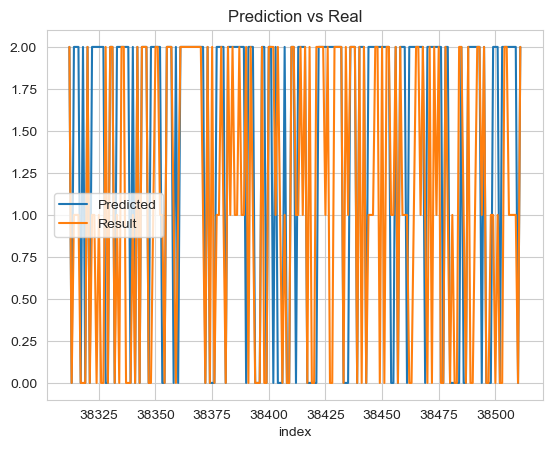

In [83]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(10,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

In [84]:
# 获取预测的概率值
probabilities = svm.predict_proba(xTe)

# 获取预测的 Top-2 类别
top2_pred = np.argsort(probabilities, axis=1)[:, -2:][:, ::-1]  # 获取 Top-2 类别，并按概率降序排列

# 创建 DataFrame 用于组织数据
df = pd.DataFrame({
    'True Label': np.ravel(yTe.to_numpy()),
    'Top-1 Prediction': np.argmax(probabilities, axis=1),  # Top-1 类别
    'Top-2 Prediction 1': top2_pred[:, 0],  # Top-2 第一个预测
    'Top-2 Prediction 2': top2_pred[:, 1]   # Top-2 第二个预测
})

# 计算 Top-1 Hit 和 Top-2 Hit
df['Top-1 Hit'] = df['True Label'] == df['Top-1 Prediction']
df['Top-2 Hit'] = df.apply(lambda row: row['True Label'] in [row['Top-2 Prediction 1'], row['Top-2 Prediction 2']], axis=1)

# 计算 Top-1 和 Top-2 的准确率
top1_accuracy = df['Top-1 Hit'].mean()
top2_accuracy = df['Top-2 Hit'].mean()

print(f"Top-1 Accuracy: {top1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top2_accuracy:.4f}")

Top-1 Accuracy: 0.5352
Top-2 Accuracy: 0.7758


In [85]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(svm, f'./sklearn_svm_{local_time}.joblib')

['./sklearn_svm_2025_05_07_09_09_02.joblib']

**3.5.2** Penalty Tuning

In [86]:
svm_params = {'C':[0.001,0.01,0.10,0.2,0.3,0.5,0.7,0.8]}

# svm_randsearch = RandomizedSearchCV(estimator=SVC(max_iter=100000),
#                                          param_distributions=svm_params,
svm_randsearch = GridSearchCV(estimator=SVC(max_iter=100000),
                                         param_grid=svm_params,
                                         scoring='accuracy',
                                         verbose=2,
                                         cv=5,
                                         n_jobs=-1)

svm_rand_results = svm_randsearch.fit(xTr, yTr.values.ravel())
print("Best: %f using %s" % (svm_rand_results.best_score_, svm_rand_results.best_params_))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
Best: 0.533851 using {'C': 0.8}


In [87]:
svm_rs = svm_rand_results.best_estimator_

In [88]:
# training score
accuracy_score(yTr.Result.values, svm_rs.predict(xTr))

0.5459209335076954

In [89]:
# testing score
accuracy_score(yTe.Result.values, svm_rs.predict(xTe))

0.546644844517185

In [90]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(svm_rs, f'./sklearn_svm_randsearch_{local_time}.joblib')

['./sklearn_svm_randsearch_2025_05_07_09_14_32.joblib']

### improve model

In [91]:
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np
import copy

class ImprovedMLPClassifier(MLPClassifier):
    def __init__(self, **kwargs):
        # Remove dropout if it's in kwargs since MLPClassifier doesn't support it
        if 'dropout' in kwargs:
            del kwargs['dropout']
        super().__init__(**kwargs)
        self.train_scores_ = []
        self.val_scores_ = []  # Changed from validation_scores_ to val_scores_
        self.loss_curve_ = []
        self.best_val_score_ = -np.inf
        self.best_model_params_ = None  # Store best model parameters instead of the whole model
        self.iter_ = 0
        
    def _partial_fit(self, X, y, *args, **kwargs):
        if self.early_stopping:
            # Split validation set
            n_samples = X.shape[0]
            n_val = int(n_samples * self.validation_fraction)
            indices = np.random.permutation(n_samples)
            val_idx = indices[:n_val]
            train_idx = indices[n_val:]
            
            X_val = X[val_idx]
            y_val = y[val_idx]
            X_train = X[train_idx]
            y_train = y[train_idx]
            
            # Train
            super()._partial_fit(X_train, y_train, *args, **kwargs)
            
            # Record scores
            train_score = accuracy_score(y_train, self.predict(X_train))
            val_score = accuracy_score(y_val, self.predict(X_val))
            
            self.train_scores_.append(train_score)
            self.val_scores_.append(val_score)
            
            # Save best model parameters
            if val_score > self.best_val_score_:
                self.best_val_score_ = val_score
                self.best_model_params_ = {
                    'coefs_': [coef.copy() for coef in self.coefs_],
                    'intercepts_': [intercept.copy() for intercept in self.intercepts_]
                }
            
            self.iter_ += 1
            if self.verbose and self.iter_ % 10 == 0:
                print(f"Epoch {len(self.train_scores_)}")
                print(f"Training Score: {train_score:.4f}")
                print(f"Validation Score: {val_score:.4f}")
                print(f"Best Validation Score: {self.best_val_score_:.4f}")
                if hasattr(self, 'loss_curve_') and len(self.loss_curve_) > 0:
                    print(f"Loss: {self.loss_curve_[-1]:.4f}")
                print("-" * 50)
        else:
            super()._partial_fit(X, y, *args, **kwargs)
            
        return self
    
    def fit(self, X, y):
        # Initialize loss curve if it doesn't exist
        if not hasattr(self, 'loss_curve_'):
            self.loss_curve_ = []
            
        super().fit(X, y)
        
        # Restore best model parameters if available
        if self.early_stopping and self.best_model_params_ is not None:
            self.coefs_ = self.best_model_params_['coefs_']
            self.intercepts_ = self.best_model_params_['intercepts_']
        return self

def train_and_evaluate_model(X_train, y_train, X_test, y_test, random_state=13):
    # Create and train model with better hyperparameters
    model = ImprovedMLPClassifier(
        hidden_layer_sizes=(64, 32),  # Smaller network
        activation='relu',
        batch_size=32,  # Smaller batch size
        max_iter=1000,
        learning_rate_init=0.0001,
        early_stopping=False,
        validation_fraction=0.2,
        alpha=0.5,  # Stronger regularization
        verbose=True,
        tol=1e-4,
        random_state=random_state,
        learning_rate='adaptive',
        n_iter_no_change=100
    )
    
    # Split training data for validation
    X_train_final, X_val, y_train_final, y_val = train_test_split(
        X_train, y_train, test_size=0.2, random_state=random_state
    )
    
    # Train model
    model.fit(X_train_final, y_train_final)
    
    # Evaluate
    train_score = accuracy_score(y_train_final, model.predict(X_train_final))
    val_score = accuracy_score(y_val, model.predict(X_val))
    test_score = accuracy_score(y_test, model.predict(X_test))
    
    print(f"\nFinal Scores:")
    print(f"Training Accuracy: {train_score:.4f}")
    print(f"Validation Accuracy: {val_score:.4f}")
    print(f"Test Accuracy: {test_score:.4f}")
    
    return model

def plot_learning_curves(model):
    import matplotlib.pyplot as plt
    
    plt.figure(figsize=(12, 4))
    
    # Learning curves
    plt.subplot(1, 2, 1)
    plt.plot(model.train_scores_, label='Training Score')
    plt.plot(model.validation_scores_, label='Validation Score')
    plt.xlabel('Iterations')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    
    # Loss curve
    if hasattr(model, 'loss_curve_') and len(model.loss_curve_) > 0:
        plt.subplot(1, 2, 2)
        plt.plot(model.loss_curve_)
        plt.xlabel('Iterations')
        plt.ylabel('Loss')
        plt.title('Loss Curve')
        plt.grid(True)
    
    plt.tight_layout()
    plt.show()

# 使用示例
def run_experiment(xTr, yTr, test_size=0.2, random_state=42):
    # 准备数据
    X_train, X_test, y_train, y_test = train_test_split(
        xTr, yTr.values.ravel(), 
        test_size=test_size, 
        random_state=random_state
    )
    
    # 训练和评估模型
    model = train_and_evaluate_model(X_train, y_train, X_test, y_test)
    
    # 绘制学习曲线
    # plot_learning_curves(model)
    
    return model

# 运行完整实验
model = run_experiment(xTr, yTr)

# # 或者分步执行
# X_train, X_test, y_train, y_test = train_test_split(xTr, yTr.values.ravel(), test_size=0.2, random_state=13)
# model = train_and_evaluate_model(X_train, y_train, X_test, y_test)
# plot_learning_curves(model)

Iteration 1, loss = 2.16726318
Iteration 2, loss = 1.77197722
Iteration 3, loss = 1.54968728
Iteration 4, loss = 1.40732958
Iteration 5, loss = 1.31360646
Iteration 6, loss = 1.25000005
Iteration 7, loss = 1.20542834
Iteration 8, loss = 1.17378315
Iteration 9, loss = 1.15016419
Iteration 10, loss = 1.13165078
Iteration 11, loss = 1.11700511
Iteration 12, loss = 1.10520062
Iteration 13, loss = 1.09585600
Iteration 14, loss = 1.08739217
Iteration 15, loss = 1.08068089
Iteration 16, loss = 1.07480059
Iteration 17, loss = 1.07006899
Iteration 18, loss = 1.06550492
Iteration 19, loss = 1.06180077
Iteration 20, loss = 1.05806800
Iteration 21, loss = 1.05466198
Iteration 22, loss = 1.05223594
Iteration 23, loss = 1.04915661
Iteration 24, loss = 1.04698993
Iteration 25, loss = 1.04460136
Iteration 26, loss = 1.04259553
Iteration 27, loss = 1.03985943
Iteration 28, loss = 1.03832070
Iteration 29, loss = 1.03659335
Iteration 30, loss = 1.03499077
Iteration 31, loss = 1.03310346
Iteration 32, los

### 3.6 Simple Neural Network ####

In [92]:
from sklearn.neural_network._stochastic_optimizers import AdamOptimizer
from sklearn.base import clone
from sklearn.neural_network import MLPClassifier

class MonitorMLPClassifier(MLPClassifier):
    def __init__(self, **kwargs):
        super().__init__(**kwargs)
        self.train_scores_ = []
        self.val_scores_ = []
        self.loss_curve_ = []
        self.iter_ = 0
    
    def _partial_fit(self, X, y, *args, **kwargs):
        if self.early_stopping:
            # 分割验证集
            n_samples = X.shape[0]
            n_val = int(n_samples * self.validation_fraction)
            X_val = X[-n_val:]
            y_val = y[-n_val:]
            X_train = X[:-n_val]
            y_train = y[:-n_val]
            
            # 训练
            super()._partial_fit(X_train, y_train, *args, **kwargs)
            
            # 记录分数
            train_score = accuracy_score(y_train, self.predict(X_train))
            val_score = accuracy_score(y_val, self.predict(X_val))
            
            self.train_scores_.append(train_score)
            self.val_scores_.append(val_score)
            self.iter_ += 1
            if self.verbose & self.iter_ % 10 == 0:
                print(f"Epoch {len(self.train_scores_)}")
                print(f"Training Score: {train_score:.4f}")
                print(f"Validation Score: {val_score:.4f}")
                print(f"Loss: {self.loss_curve_[-1]:.4f}")
                print("-" * 50)
        else:
            super()._partial_fit(X, y, *args, **kwargs)
            
        return self


# 使用示例
monitor_clf = MonitorMLPClassifier(
    hidden_layer_sizes=(256,128,64),
    activation='relu',
    batch_size=512,
    max_iter=10000,
    learning_rate_init=1e-4,
    early_stopping=False,
    alpha=3e-1,
    verbose=True,
    tol=1e-4,
    random_state=13,
    learning_rate='adaptive',
    n_iter_no_change=10,
    validation_fraction=0.2
).fit(xTr, yTr.values.ravel())

# # 绘制训练过程
# import matplotlib.pyplot as plt
# 
# plt.figure(figsize=(10, 6))
# plt.plot(monitor_clf.train_scores_, label='Training Score')
# plt.plot(monitor_clf.validation_scores_, label='Validation Score')
# plt.xlabel('Iterations')
# plt.ylabel('Score')
# plt.title('Training and Validation Scores Over Time')
# plt.legend()
# plt.grid(True)
# plt.show()

Iteration 1, loss = 1.25702497
Iteration 2, loss = 1.19848363
Iteration 3, loss = 1.16722996
Iteration 4, loss = 1.14980160
Iteration 5, loss = 1.13810559
Iteration 6, loss = 1.12997357
Iteration 7, loss = 1.12286818
Iteration 8, loss = 1.11715374
Iteration 9, loss = 1.11160461
Iteration 10, loss = 1.10666049
Iteration 11, loss = 1.10167135
Iteration 12, loss = 1.09722934
Iteration 13, loss = 1.09348731
Iteration 14, loss = 1.08965176
Iteration 15, loss = 1.08518597
Iteration 16, loss = 1.08223942
Iteration 17, loss = 1.07834747
Iteration 18, loss = 1.07550377
Iteration 19, loss = 1.07140390
Iteration 20, loss = 1.06837388
Iteration 21, loss = 1.06525684
Iteration 22, loss = 1.06240578
Iteration 23, loss = 1.06012862
Iteration 24, loss = 1.05670355
Iteration 25, loss = 1.05366261
Iteration 26, loss = 1.05112090
Iteration 27, loss = 1.04807926
Iteration 28, loss = 1.04509623
Iteration 29, loss = 1.04317343
Iteration 30, loss = 1.04057415
Iteration 31, loss = 1.03792077
Iteration 32, los

In [93]:
# training score
accuracy_score(yTr.Result.values, monitor_clf.predict(xTr))


1.0

In [94]:
# testing score
accuracy_score(yTe.Result.values, monitor_clf.predict(xTe))

0.41898527004909986

In [179]:
# from sklearn.neural_network import MLPClassifier
# mlp = MLPClassifier(hidden_layer_sizes=(512,128,32),
#                     activation='relu',
#                     batch_size=512,
#                     max_iter=10000,
#                     learning_rate_init=1e-4,
#                     early_stopping=True,
#                     alpha=1e-3,
#                    ).fit(xTr, yTr.values.ravel())
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(128,64,32),
                    activation='tanh',
                    batch_size=512,
                    max_iter=10000,
                    learning_rate_init=1e-4,
                    early_stopping=False,
                    alpha=3e-1,
                    verbose=True,
                    tol=1e-4,
                    random_state=13,
                    shuffle=True,
                    learning_rate='adaptive',
                    n_iter_no_change=10
                   ).fit(xTr, yTr.values.ravel())
mlp

Iteration 1, loss = 1.20048099
Iteration 2, loss = 1.12451723
Iteration 3, loss = 1.09352872
Iteration 4, loss = 1.08068973
Iteration 5, loss = 1.07434788
Iteration 6, loss = 1.07004042
Iteration 7, loss = 1.06610691
Iteration 8, loss = 1.06304268
Iteration 9, loss = 1.06006111
Iteration 10, loss = 1.05756766
Iteration 11, loss = 1.05486547
Iteration 12, loss = 1.05287447
Iteration 13, loss = 1.05052446
Iteration 14, loss = 1.04844200
Iteration 15, loss = 1.04660811
Iteration 16, loss = 1.04459970
Iteration 17, loss = 1.04284023
Iteration 18, loss = 1.04109591
Iteration 19, loss = 1.03956980
Iteration 20, loss = 1.03778142
Iteration 21, loss = 1.03633503
Iteration 22, loss = 1.03458412
Iteration 23, loss = 1.03313325
Iteration 24, loss = 1.03201110
Iteration 25, loss = 1.03054828
Iteration 26, loss = 1.02880236
Iteration 27, loss = 1.02776361
Iteration 28, loss = 1.02610645
Iteration 29, loss = 1.02493934
Iteration 30, loss = 1.02350180
Iteration 31, loss = 1.02252773
Iteration 32, los

MLPClassifier(activation='tanh', alpha=0.3, batch_size=512,
              hidden_layer_sizes=(128, 64, 32), learning_rate='adaptive',
              learning_rate_init=0.0001, max_iter=10000, random_state=13,
              verbose=True)

In [180]:
# training score
accuracy_score(yTr.Result.values, mlp.predict(xTr))

0.8594708781812694

In [181]:
# testing score
accuracy_score(yTe.Result.values, mlp.predict(xTe))

0.4026186579378069

In [166]:
# 获取预测概率
probs = mlp.predict_proba(xTe)

# 初始化计数器
top1_correct = 0
top2_correct = 0

# 遍历每个样本的预测概率
for i, prob in enumerate(probs):
    # 获取 Top-1 类别的索引（最大概率的索引）
    top1_idx = np.argmax(prob)
    
    # 获取 Top-2 概率的索引（最大和第二大概率的索引）e
    top2_idx = np.argsort(prob)[-2:][::-1]
    
    # 判断 Top-1 是否正确
    if yTe.iloc[i].item() == top1_idx:
        top1_correct += 1
    
    # 判断 Top-2 是否包含真实标签
    if yTe.iloc[i].item() in top2_idx:
        top2_correct += 1

# 计算 Top-1 和 Top-2 正确率
top1_accuracy = top1_correct / len(yTe)
top2_accuracy = top2_correct / len(yTe)

print(f"Top-1 Accuracy: {top1_accuracy * 100:.2f}%")
print(f"Top-2 Accuracy: {top2_accuracy * 100:.2f}%")

Top-1 Accuracy: 49.43%
Top-2 Accuracy: 74.80%


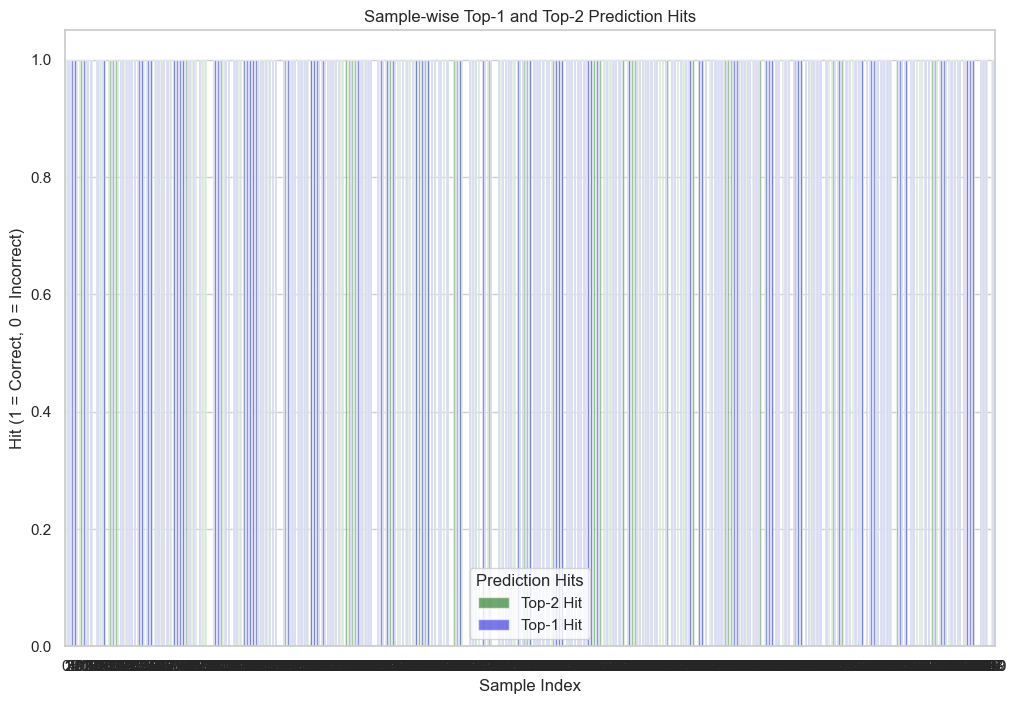

In [167]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 假设这是你的概率数组 (345, 3)
probabilities = probs

# 假设这是你的真实标签数组 (345,)
true_labels = np.ravel(yTe.to_numpy())

# 计算每个样本的 Top-1 和 Top-2 预测类别
top1_pred = np.argmax(probabilities, axis=1)
top2_pred = np.argsort(probabilities, axis=1)[:, -2:][:, ::-1]  # 取前两名类别，并从大到小排序

# 创建一个 DataFrame 来组织数据
import pandas as pd
df = pd.DataFrame({
    'True Label': true_labels,
    'Top-1 Prediction': top1_pred,
    'Top-2 Prediction 1': top2_pred[:, 0],  # Top-2 第一个预测
    'Top-2 Prediction 2': top2_pred[:, 1]   # Top-2 第二个预测
})

# 判断 Top-1 和 Top-2 是否命中
df['Top-1 Hit'] = df['True Label'] == df['Top-1 Prediction']
# df['Top-2 Hit'] = df['True Label'].isin(df[['Top-2 Prediction 1', 'Top-2 Prediction 2']].values)

df['Top-2 Hit'] = df.apply(lambda row: row['True Label'] in [row['Top-2 Prediction 1'], row['Top-2 Prediction 2']], axis=1)
# 可视化每个样本的 Top-1 和 Top-2 预测情况
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")

# 通过条形图展示每个样本的 Top-1 和 Top-2 命中情况
sns.barplot(x=df.index, y=df['Top-2 Hit'], color='green', alpha=0.6, label='Top-2 Hit', errorbar=None)
sns.barplot(x=df.index, y=df['Top-1 Hit'], color='blue', alpha=0.6, label='Top-1 Hit', errorbar=None)
# 绘制 Top-2 未命中的情况（橙色）
# sns.barplot(x=df.index, y=~df['Top-2 Hit'], color='orange', alpha=0.6, label='Top-2 Missed', errorbar=None)

plt.title("Sample-wise Top-1 and Top-2 Prediction Hits")
plt.xlabel("Sample Index")
plt.ylabel("Hit (1 = Correct, 0 = Incorrect)")
plt.legend(title="Prediction Hits")
plt.show()


In [168]:
xTr

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
27960,-0.907831,4.966933,4.490296,-2.379270,0.064994,-0.133916,2.945899,-0.496539,-2,0,...,2,0.866025,0.500000,0.635432,0.772157,1,0,0,0.0,0.0
27961,0.127385,-0.630368,-0.581920,0.336613,1.194545,-2.506152,-1.049027,0.312709,0,0,...,2,0.866025,0.500000,0.635432,0.772157,2,0,0,0.0,0.0
27962,-0.223253,-0.797452,-0.328766,0.034848,0.681113,-0.780889,-1.113524,-1.128620,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,0,0,0,0.0,0.0
27963,-0.457011,-0.379743,-0.206765,-0.266917,0.578426,-0.673060,0.000863,-0.588466,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,3,0,0,0.0,0.0
27964,-0.223253,-0.713910,-0.359267,0.034848,0.989172,-1.104376,-1.513132,-1.640352,-1,0,...,2,0.866025,0.500000,0.648630,0.761104,0,0,0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37896,-0.345698,-0.463284,-0.313516,0.034848,-0.345752,0.620887,-0.990445,-0.652696,-1,0,...,7,-0.500000,-0.866025,-0.440519,-0.897743,0,0,0,3.0,3.0
37897,0.294356,-0.880993,-0.578870,0.638378,-1.269930,1.591347,-0.833143,-0.383677,1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,2,1,0,4.0,3.0
37898,0.867621,-0.296201,-0.746622,0.940142,1.297231,-1.104376,-0.905079,0.107659,1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,1,1,1,3.0,4.0
37899,-0.345698,-0.546826,-0.237265,0.034848,-0.859184,1.160031,-0.895825,-0.814958,-1,0,...,7,-0.500000,-0.866025,-0.501242,-0.865307,2,0,0,3.0,2.0


In [169]:
yTr

,Result
27960,2
27961,0
27962,2
27963,1
27964,1
...,...
37896,1
37897,0
37898,0
37899,0


In [170]:
xTe

,B365H,B365D,B365A,AHh,B365AHH,B365AHA,HomeTeamELO,AwayTeamELO,balance_val,Div 0,...,Month,Sin_Month,Cos_Month,Sin_Day,Cos_Day,Last Match Result,HomeWinStreak,AwayWinStreak,HomeWinsToDate,AwayWinsToDate
37901,-0.751992,0.372134,0.982751,-1.172211,0.783799,-0.888718,1.715124,0.169921,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,2,0,0,7.0,3.0
37902,-0.763124,0.230113,1.287755,-1.172211,0.989172,-1.104376,1.387092,-0.428579,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,2,0,0,8.0,5.0
37903,-0.957922,10.814859,6.625324,-3.586329,-0.756498,0.728716,1.601968,-1.460150,-3,1,...,8,-0.866025,-0.500000,-0.516062,-0.856551,3,7,0,8.0,0.0
37904,0.016072,-0.546826,-0.542269,0.336613,1.091858,-1.212205,-1.430615,-0.418918,0,1,...,8,-0.866025,-0.500000,-0.516062,-0.856551,0,0,0,2.0,2.0
37905,-0.484840,-0.463284,-0.023762,-0.266917,-0.448439,0.405229,0.698775,-0.804872,-1,0,...,8,-0.866025,-0.500000,-0.516062,-0.856551,3,1,0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38507,-0.123070,-0.880993,-0.389767,0.034848,1.502604,-2.721810,-0.095350,0.852679,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,2,0,0,7.0,6.0
38508,-0.373526,-0.296201,-0.313516,0.034848,-2.091422,1.052202,0.286739,0.788336,-1,0,...,11,-0.500000,0.866025,-0.821477,0.570242,1,0,0,5.0,5.0
38509,-0.290041,-0.546826,-0.328766,0.034848,-0.243066,-1.104376,0.929056,0.887487,-1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,1,0,1,5.0,9.0
38510,1.101379,-0.296201,-0.755772,1.241907,-1.577990,0.297400,-0.322220,0.730564,1,0,...,11,-0.500000,0.866025,-0.811539,0.584298,0,0,2,5.0,8.0


In [171]:
yTe

,Result
37901,1
37902,2
37903,2
37904,0
37905,2
...,...
38507,1
38508,1
38509,1
38510,0


In [172]:
predict_val = mlp.predict(xTe)
series_pre = pd.Series(predict_val, name='Predicted')
compare_result = pd.concat([series_pre, yTe.reset_index()], axis=1)
compare_result

,Predicted,index,Result
0,2,37901,1
1,2,37902,2
2,2,37903,2
3,0,37904,0
4,2,37905,2
...,...,...,...
606,0,38507,1
607,2,38508,1
608,0,38509,1
609,0,38510,0


<Figure size 2000x1000 with 0 Axes>

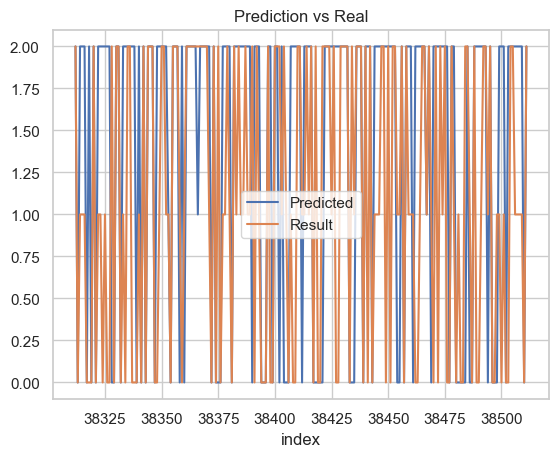

In [159]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(20,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

In [106]:
# xTr = xTr.drop(columns=['pad1', 'pad2', 'pad3'])
# xTe = xTe.drop(columns=['pad1', 'pad2', 'pad3'])

### 保存模型

In [107]:
import time
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
dump(mlp, f'./sklearn_mlp_{local_time}.joblib')

['./sklearn_mlp_2025_05_07_09_23_44.joblib']

In [108]:
# ### 加载模型
# # model_name = 'sklearn_mlp_' + local_time + '.joblib'
# model_name = './' + 'sklearn_mlp_2025_01_21_22_41_15.joblib'
# mlp = load(model_name)

In [109]:
# model_name = './' + 'sklearn_mlp_2025_01_31_09_00_15.joblib'
# mlp = load(model_name)
# predict_val = mlp.predict(xTe)
# series_pre = pd.Series(predict_val, name='Predicted')
# compare_result = pd.concat([series_pre, yTe.reset_index()], axis=1)
# compare_result

In [110]:
# testing score
# accuracy_score(yTe.Result.values, mlp.predict(xTe))

In [111]:
# import matplotlib.pyplot as plt
# result_subset = compare_result.tail(200)
# plt.figure(figsize=(10,10))
# result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
# plt.title("Prediction vs Real")
# plt.show()

### 自定义的pytorch模型结构

Epoch [1/1000], Train Loss: 0.1102, Validation Loss: 0.1095
Epoch [2/1000], Train Loss: 0.1096, Validation Loss: 0.1093
Epoch [3/1000], Train Loss: 0.1097, Validation Loss: 0.1091
Epoch [4/1000], Train Loss: 0.1098, Validation Loss: 0.1089
Epoch [5/1000], Train Loss: 0.1097, Validation Loss: 0.1087
Epoch [6/1000], Train Loss: 0.1097, Validation Loss: 0.1086
Epoch [7/1000], Train Loss: 0.1092, Validation Loss: 0.1084
Epoch [8/1000], Train Loss: 0.1094, Validation Loss: 0.1082
Epoch [9/1000], Train Loss: 0.1092, Validation Loss: 0.1080
Epoch [10/1000], Train Loss: 0.1088, Validation Loss: 0.1079
Epoch [11/1000], Train Loss: 0.1088, Validation Loss: 0.1077
Epoch [12/1000], Train Loss: 0.1085, Validation Loss: 0.1076
Epoch [13/1000], Train Loss: 0.1084, Validation Loss: 0.1074
Epoch [14/1000], Train Loss: 0.1083, Validation Loss: 0.1073
Epoch [15/1000], Train Loss: 0.1083, Validation Loss: 0.1071
Epoch [16/1000], Train Loss: 0.1082, Validation Loss: 0.1070
Epoch [17/1000], Train Loss: 0.10

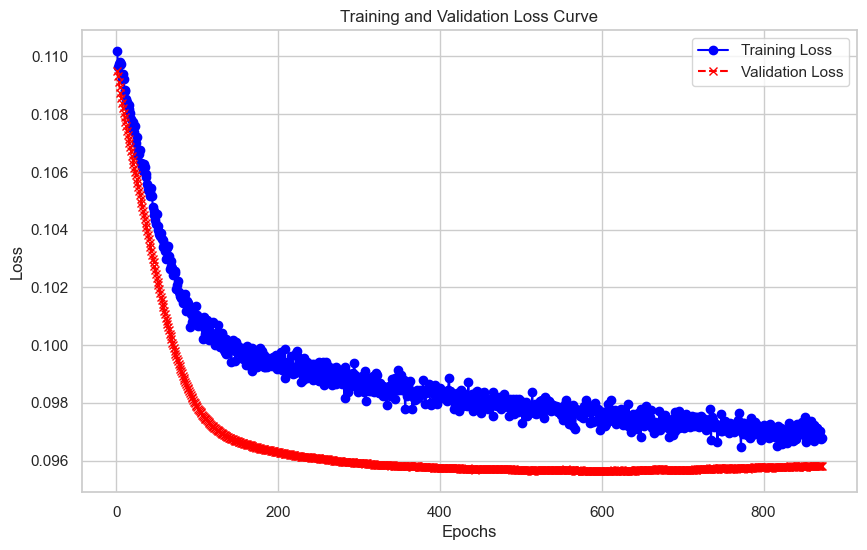

Top-1 Accuracy: 0.5417
Top-2 Accuracy: 0.7676
Top-1 train: 0.5455
Top-2 train: 0.8030


In [112]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-5, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


Epoch [1/1000], Train Loss: 0.1102, Validation Loss: 0.1095
Epoch [2/1000], Train Loss: 0.1096, Validation Loss: 0.1093
Epoch [3/1000], Train Loss: 0.1097, Validation Loss: 0.1091
Epoch [4/1000], Train Loss: 0.1098, Validation Loss: 0.1089
Epoch [5/1000], Train Loss: 0.1097, Validation Loss: 0.1087
Epoch [6/1000], Train Loss: 0.1097, Validation Loss: 0.1086
Epoch [7/1000], Train Loss: 0.1092, Validation Loss: 0.1084
Epoch [8/1000], Train Loss: 0.1094, Validation Loss: 0.1082
Epoch [9/1000], Train Loss: 0.1092, Validation Loss: 0.1080
Epoch [10/1000], Train Loss: 0.1088, Validation Loss: 0.1079
Epoch [11/1000], Train Loss: 0.1088, Validation Loss: 0.1077
Epoch [12/1000], Train Loss: 0.1085, Validation Loss: 0.1076
Epoch [13/1000], Train Loss: 0.1084, Validation Loss: 0.1074
Epoch [14/1000], Train Loss: 0.1083, Validation Loss: 0.1073
Epoch [15/1000], Train Loss: 0.1083, Validation Loss: 0.1071
Epoch [16/1000], Train Loss: 0.1082, Validation Loss: 0.1070
Epoch [17/1000], Train Loss: 0.10

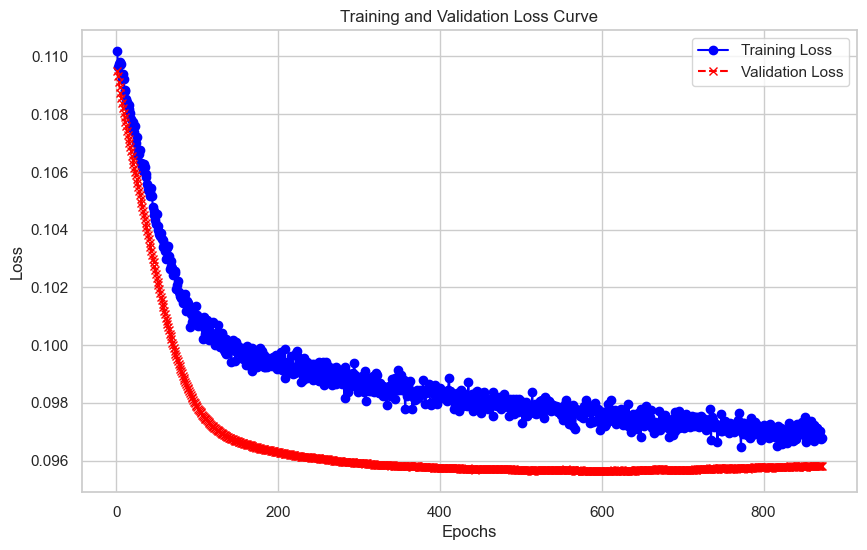

Top-1 Accuracy: 0.5417
Top-2 Accuracy: 0.7676
Top-1 train: 0.5455
Top-2 train: 0.8030


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-5, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


Epoch [1/1000], Train Loss: 0.1102, Validation Loss: 0.1095
Epoch [2/1000], Train Loss: 0.1096, Validation Loss: 0.1093
Epoch [3/1000], Train Loss: 0.1097, Validation Loss: 0.1091
Epoch [4/1000], Train Loss: 0.1098, Validation Loss: 0.1089
Epoch [5/1000], Train Loss: 0.1097, Validation Loss: 0.1087
Epoch [6/1000], Train Loss: 0.1097, Validation Loss: 0.1086
Epoch [7/1000], Train Loss: 0.1092, Validation Loss: 0.1084
Epoch [8/1000], Train Loss: 0.1094, Validation Loss: 0.1082
Epoch [9/1000], Train Loss: 0.1092, Validation Loss: 0.1080
Epoch [10/1000], Train Loss: 0.1088, Validation Loss: 0.1079
Epoch [11/1000], Train Loss: 0.1088, Validation Loss: 0.1077
Epoch [12/1000], Train Loss: 0.1085, Validation Loss: 0.1076
Epoch [13/1000], Train Loss: 0.1084, Validation Loss: 0.1074
Epoch [14/1000], Train Loss: 0.1083, Validation Loss: 0.1073
Epoch [15/1000], Train Loss: 0.1083, Validation Loss: 0.1071
Epoch [16/1000], Train Loss: 0.1082, Validation Loss: 0.1070
Epoch [17/1000], Train Loss: 0.10

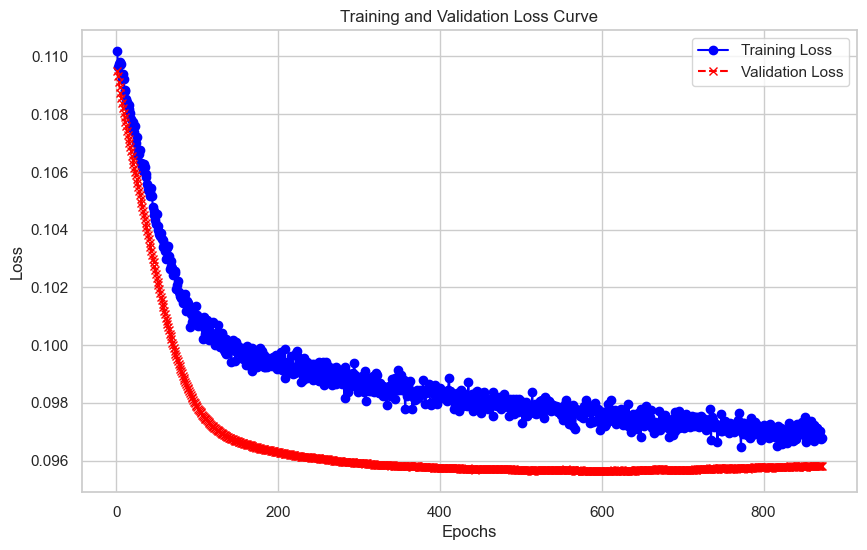

Top-1 Accuracy: 0.5417
Top-2 Accuracy: 0.7676
Top-1 train: 0.5455
Top-2 train: 0.8030


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-5, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


Epoch [1/1000], Train Loss: 0.1102, Validation Loss: 0.1095
Epoch [2/1000], Train Loss: 0.1096, Validation Loss: 0.1093
Epoch [3/1000], Train Loss: 0.1097, Validation Loss: 0.1091
Epoch [4/1000], Train Loss: 0.1098, Validation Loss: 0.1089
Epoch [5/1000], Train Loss: 0.1097, Validation Loss: 0.1087
Epoch [6/1000], Train Loss: 0.1097, Validation Loss: 0.1086
Epoch [7/1000], Train Loss: 0.1092, Validation Loss: 0.1084
Epoch [8/1000], Train Loss: 0.1094, Validation Loss: 0.1082
Epoch [9/1000], Train Loss: 0.1092, Validation Loss: 0.1080
Epoch [10/1000], Train Loss: 0.1088, Validation Loss: 0.1079
Epoch [11/1000], Train Loss: 0.1088, Validation Loss: 0.1077
Epoch [12/1000], Train Loss: 0.1085, Validation Loss: 0.1076
Epoch [13/1000], Train Loss: 0.1084, Validation Loss: 0.1074
Epoch [14/1000], Train Loss: 0.1083, Validation Loss: 0.1073
Epoch [15/1000], Train Loss: 0.1083, Validation Loss: 0.1071
Epoch [16/1000], Train Loss: 0.1082, Validation Loss: 0.1070
Epoch [17/1000], Train Loss: 0.10

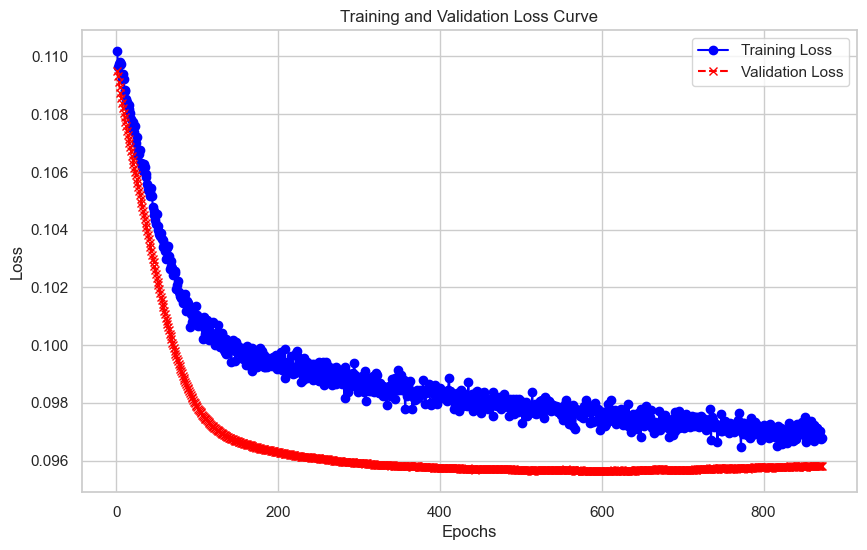

Top-1 Accuracy: 0.5417
Top-2 Accuracy: 0.7676
Top-1 train: 0.5455
Top-2 train: 0.8030


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-5, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


Epoch [1/1000], Train Loss: 0.1102, Validation Loss: 0.1095
Epoch [2/1000], Train Loss: 0.1096, Validation Loss: 0.1093
Epoch [3/1000], Train Loss: 0.1097, Validation Loss: 0.1091
Epoch [4/1000], Train Loss: 0.1098, Validation Loss: 0.1089
Epoch [5/1000], Train Loss: 0.1097, Validation Loss: 0.1087
Epoch [6/1000], Train Loss: 0.1097, Validation Loss: 0.1086
Epoch [7/1000], Train Loss: 0.1092, Validation Loss: 0.1084
Epoch [8/1000], Train Loss: 0.1094, Validation Loss: 0.1082
Epoch [9/1000], Train Loss: 0.1092, Validation Loss: 0.1080
Epoch [10/1000], Train Loss: 0.1088, Validation Loss: 0.1079
Epoch [11/1000], Train Loss: 0.1088, Validation Loss: 0.1077
Epoch [12/1000], Train Loss: 0.1085, Validation Loss: 0.1076
Epoch [13/1000], Train Loss: 0.1084, Validation Loss: 0.1074
Epoch [14/1000], Train Loss: 0.1083, Validation Loss: 0.1073
Epoch [15/1000], Train Loss: 0.1083, Validation Loss: 0.1071
Epoch [16/1000], Train Loss: 0.1082, Validation Loss: 0.1070
Epoch [17/1000], Train Loss: 0.10

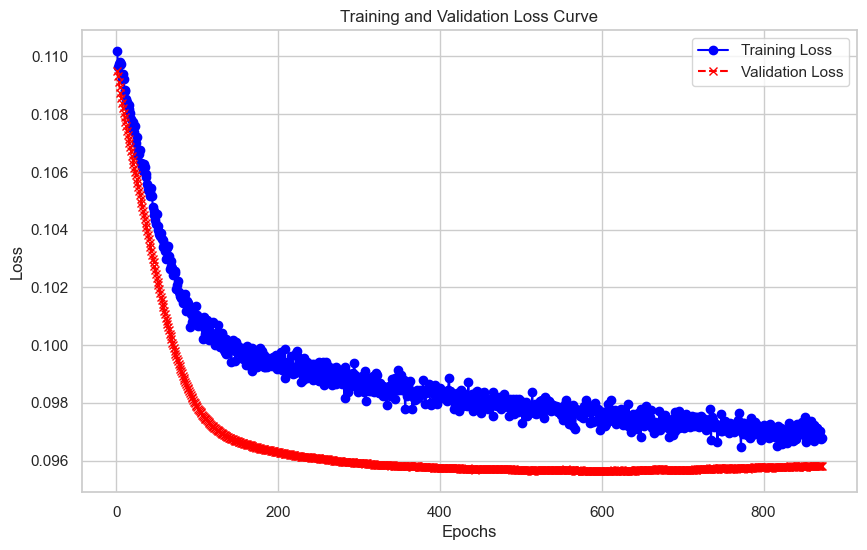

Top-1 Accuracy: 0.5417
Top-2 Accuracy: 0.7676
Top-1 train: 0.5455
Top-2 train: 0.8030


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np
import torch.nn.init as init

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# 自定义的 top-k loss
def top_k_loss(y_true, y_pred, top_k=2, top_1_weight=1.0, top_2_weight=0.5, misclassification_weight=3):
    """
    y_true: 真实标签，形状 [batch_size]
    y_pred: 模型预测的 logits，形状 [batch_size, num_classes]
    top_k: top-k 的 k 值
    top_1_weight: top-1 命中的权重（越高越小）
    top_2_weight: top-2 命中的权重（越高越小）
    misclassification_weight: 未命中的样本的损失权重（越高越大）
    """
    # # 获取 top-k 的类别索引和对应的概率值
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算命中情况：top-1 和 top-2
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # 计算损失
    # # top-1 命中损失为 0，top-2 命中损失较小，未命中损失较大
    # loss = torch.where(top_1_correct == 1.0, torch.tensor(top_1_weight), torch.tensor(top_2_weight))
    # loss = torch.where(top_2_correct == 1.0, loss, torch.tensor(misclassification_weight))
    # 
    # return loss.mean()

    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # # print('y_pred: ', y_pred)
    # # print('y_true', y_true)
    # # print('top_k_values: ', top_k_values)
    # # print('top_k_indices: ', top_k_indices)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()  # top-1 命中
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()  # top-2 命中
    # 
    # # **关键修改：让损失函数与 y_pred 相关，并使用 -log 计算损失**
    # # y_pred_prob = torch.softmax(y_pred, dim=1)  # 转换为概率分布
    # y_pred_confidence = torch.gather(y_pred, 1, y_true.unsqueeze(1)).squeeze(1)  # 获取真实类别的置信度
    # 
    # # **修改损失计算方式**
    # loss = -torch.log(y_pred_confidence + 1e-9) * (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )
    # 
    # return loss.mean()
    
    """
    结合 CrossEntropyLoss 和自定义权重的 Top-K 损失
    """
    # 计算 CrossEntropyLoss
    # ce_loss = F.cross_entropy(y_pred, y_true, reduction='none')  # [batch_size]
    # print('y_true', y_true) 
    # print(f'y_pred {torch.round(y_pred * 10) / 10}')
    # # 获取 top-k 预测的类别索引
    # top_k_values, top_k_indices = torch.topk(y_pred, top_k, dim=1, largest=True, sorted=True)
    # 
    # # 计算 top-1 和 top-2 命中情况
    # top_1_correct = (top_k_indices[:, 0] == y_true).float()
    # top_2_correct = ((top_k_indices[:, 0] == y_true) | (top_k_indices[:, 1] == y_true)).float()
    # 
    # # 应用不同的权重
    # weight = (
    #     top_1_correct * top_1_weight +
    #     (1 - top_1_correct) * top_2_correct * top_2_weight +
    #     (1 - top_2_correct) * misclassification_weight
    # )

    # return (ce_loss * weight).mean()
    # loss = F.l1_loss(y_pred, y_true, reduction='mean')
    loss = F.smooth_l1_loss(y_pred, y_true, beta=1.0)
    # return ce_loss.mean()
    return loss

# 定义 MLP 模型（与之前类似）
class MLPModel(nn.Module):
    def __init__(self, input_dim, hidden_layers=[256, 128, 32], output_dim=3, dropout_prob=0.3):
        super(MLPModel, self).__init__()

        layers = []
        in_dim = input_dim
        for hidden_dim in hidden_layers:
            layers.append(nn.Linear(in_dim, hidden_dim))
            # self.initialize_weights(layers[-1], method='kaiming')  # 使用Kaiming初始化
            # layers.append(nn.BatchNorm1d(hidden_dim))  # 添加 BatchNorm 层
            layers.append(nn.ReLU())
            layers.append(nn.Dropout(dropout_prob))  # 添加 Dropout 层
            in_dim = hidden_dim
            
        layers.append(nn.Linear(in_dim, output_dim))  # 输出层
        # self.initialize_weights(layers[-2], method='kaiming')  # 输出层初始化
        layers.append(nn.Softmax(dim=1))  # 归一化为概率分布
        self.network = nn.Sequential(*layers)

    def forward(self, x):
        return self.network(x)  # 将 softmax 归一化到 (0,2) 范围
    
    def initialize_weights(self, layer, method='kaiming'):
        """
        初始化网络的权重
        :param layer: 当前层
        :param method: 初始化方法 ('kaiming' 或 'xavier')
        """
        if isinstance(layer, nn.Linear):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')  # for ELU/Relu
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)  # for tanh or sigmoid activations
            if layer.bias is not None:
                init.zeros_(layer.bias)  # 初始化偏置为0
        elif isinstance(layer, nn.Conv1d):
            if method == 'kaiming':
                init.kaiming_normal_(layer.weight, mode='fan_in', nonlinearity='relu')
            elif method == 'xavier':
                init.xavier_normal_(layer.weight)
            if layer.bias is not None:
                init.zeros_(layer.bias)  # Conv层的偏置初始化为0

# 定义训练过程
def train_model(model, x_train, y_train, x_val, y_val, epochs=100, batch_size=512, 
                learning_rate=1e-4, early_stopping=False, patience=10):
    # 创建优化器
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = top_k_loss  # 使用自定义的 top-k loss

    # 批次处理数据
    dataset = torch.utils.data.TensorDataset(x_train, y_train)
    dataloader = torch.utils.data.DataLoader(dataset, batch_size=batch_size, shuffle=True)

    # 初始化早期停止相关变量
    best_train_loss = 100
    epochs_without_improvement = 0
    best_model_weights = None

    # 用于记录训练损失和验证损失
    train_losses = []
    val_losses = []

    for epoch in range(epochs):
        # 训练阶段
        model.train()
        running_train_loss = 0.0
        for batch_idx, (inputs, labels) in enumerate(dataloader):
            optimizer.zero_grad()

            # 前向传播
            outputs = model(inputs)
            loss = criterion(labels, outputs)  # 计算损失
            running_train_loss += loss.item()

            # 反向传播和优化
            loss.backward()
            optimizer.step()

        # 计算训练集上的平均损失
        train_loss = running_train_loss / len(dataloader)

        # 计算验证集上的损失
        model.eval()
        with torch.no_grad():
            val_outputs = model(x_val)
            val_loss = criterion(y_val, val_outputs)

        # 保存训练损失和验证损失
        train_losses.append(train_loss)
        
        val_losses.append(val_loss.item())

        # 打印当前的训练损失和验证损失
        print(f"Epoch [{epoch+1}/{epochs}], Train Loss: {train_loss:.4f}, Validation Loss: {val_loss:.4f}")

        # 早期停止：检查验证损失
        if early_stopping:
            if (best_train_loss - train_loss) - best_train_loss * 0.0001 > 0:
                best_train_loss = train_loss
                best_model_weights = model.state_dict()
                epochs_without_improvement = 0
            else:
                epochs_without_improvement += 1
                if epochs_without_improvement >= patience:
                    print("Early stopping triggered.")
                    break

    # 恢复最好的模型权重
    if early_stopping and best_model_weights:
        model.load_state_dict(best_model_weights)

    # 绘制训练损失和验证损失的曲线
    plot_loss_curve(train_losses, val_losses)

    return model

# 计算 top-k 准确率
def compute_top_k_accuracy(model, x_test, y_test, k=2):
    model.eval()
    with torch.no_grad():
        outputs = model(x_test)
        _, top_k_indices = torch.topk(outputs, k, dim=1, largest=True, sorted=True)
        correct_top_1 = torch.sum(top_k_indices[:, 0] == y_test).item()
        correct_top_2 = torch.sum((top_k_indices[:, 0] == y_test) | (top_k_indices[:, 1] == y_test)).item()
        top_1_accuracy = correct_top_1 / len(y_test)
        top_2_accuracy = correct_top_2 / len(y_test)
    return top_1_accuracy, top_2_accuracy

# 绘制训练和验证损失的曲线
def plot_loss_curve(train_losses, val_losses):
    plt.figure(figsize=(10, 6))
    plt.plot(range(1, len(train_losses) + 1), train_losses, label='Training Loss', color='blue', linestyle='-', marker='o')
    plt.plot(range(1, len(val_losses) + 1), val_losses, label='Validation Loss', color='red', linestyle='--', marker='x')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training and Validation Loss Curve')
    plt.legend()
    plt.grid(True)
    plt.show()


# 从 pandas 数据加载训练和验证数据
def load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd, num_classes=3):
    """
    将 pandas 数据加载为 torch 张量
    x_train_pd: pandas DataFrame, 训练数据
    y_train_pd: pandas Series, 训练标签
    x_val_pd: pandas DataFrame, 验证数据
    y_val_pd: pandas Series, 验证标签
    """
    # 将 pandas DataFrame 转换为 torch Tensor
    x_train = torch.tensor(x_train_pd.values.astype('float32'), dtype=torch.float32).to(device)
    x_val = torch.tensor(x_val_pd.values.astype('float32'), dtype=torch.float32).to(device)

    # 将 pandas Series 转换为 torch Tensor，并进行 one-hot 编码
    y_train = torch.tensor(y_train_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)
    y_val = torch.tensor(y_val_pd.values.astype('int64'), dtype=torch.int64).reshape(-1).to(device)

    # 进行 one-hot 编码
    y_train_one_hot = torch.nn.functional.one_hot(y_train, num_classes=num_classes).float()
    y_val_one_hot = torch.nn.functional.one_hot(y_val, num_classes=num_classes).float()
    # y_train_one_hot = y_train
    # y_val_one_hot = y_val

    return x_train, y_train_one_hot, x_val, y_val_one_hot

# 假设我们有 pandas 数据
x_train_pd = xTr
y_train_pd = yTr
x_val_pd = xTe
y_val_pd = yTe

torch.manual_seed(13)

# 从 pandas 数据加载到 PyTorch 张量
x_train, y_train, x_val, y_val = load_data_from_pandas(x_train_pd, y_train_pd, x_val_pd, y_val_pd)

# 模型初始化
input_dim = xTr.shape[1]  # 特征维度
model = MLPModel(input_dim=input_dim, hidden_layers=[128, 64, 16], output_dim=3, dropout_prob=0.6).to(device)

# 训练模型
trained_model = train_model(model, x_train, y_train, x_val, y_val, epochs=1000, batch_size=512, learning_rate=1e-5, early_stopping=True, patience=100)

# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(trained_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(trained_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")


In [113]:
local_time = time.strftime("%Y_%m_%d_%H_%M_%S", time.localtime())
torch.save(trained_model, f"./MLPModel_{local_time}.pt")
print(f"MLPModel_{local_time}.pt is saved.")

MLPModel_2025_05_07_09_25_09.pt is saved.


In [114]:
# eval_model = torch.load("./MLPModel_2025_02_05_12_59_59.pt")
eval_model = torch.load("./MLPModel_2025_02_07_12_11_26.pt")
# eval_model = torch.load("./MLPModel_2025_02_10_13_55_41.pt")
print(eval_model)
# 评估模型的 top-1 和 top-2 准确率
y_val_fix = torch.argmax(y_val, dim=1)
top_1_accuracy, top_2_accuracy = compute_top_k_accuracy(eval_model, x_val, y_val_fix, k=2)
print(f"Top-1 Accuracy: {top_1_accuracy:.4f}")
print(f"Top-2 Accuracy: {top_2_accuracy:.4f}")
y_train_fix = torch.argmax(y_train, dim=1)
top_1_train, top_2_train = compute_top_k_accuracy(eval_model, x_train, y_train_fix, k=2)
print(f"Top-1 train: {top_1_train:.4f}")
print(f"Top-2 train: {top_2_train:.4f}")

MLPModel(
  (network): Sequential(
    (0): Linear(in_features=439, out_features=128, bias=True)
    (1): ELU(alpha=1.0)
    (2): Dropout(p=0.6, inplace=False)
    (3): Linear(in_features=128, out_features=64, bias=True)
    (4): ELU(alpha=1.0)
    (5): Dropout(p=0.6, inplace=False)
    (6): Linear(in_features=64, out_features=32, bias=True)
    (7): ELU(alpha=1.0)
    (8): Dropout(p=0.6, inplace=False)
    (9): Linear(in_features=32, out_features=16, bias=True)
    (10): ELU(alpha=1.0)
    (11): Dropout(p=0.6, inplace=False)
    (12): Linear(in_features=16, out_features=3, bias=True)
    (13): Softmax(dim=1)
  )
)
Top-1 Accuracy: 0.2570
Top-2 Accuracy: 0.6547
Top-1 train: 0.3119
Top-2 train: 0.6689


In [115]:
x_val = torch.tensor(xTe.values.astype('float32'), dtype=torch.float32).to(device)
predict_val = trained_model(x_val).cpu().detach().numpy()
# series_pre = pd.Series(predict_val, name='Predicted')
frame_pre = pd.DataFrame(predict_val, columns=['Predicted_1', 'Predicted_2', 'Predicted_3'])
compare_result = pd.concat([frame_pre, yTe.reset_index()], axis=1)
compare_result

,Predicted_1,Predicted_2,Predicted_3,index,Result
0,0.125964,0.215803,0.658233,37901,1
1,0.076901,0.173146,0.749953,37902,2
2,0.012876,0.055742,0.931382,37903,2
3,0.377174,0.299279,0.323548,37904,0
4,0.179809,0.266167,0.554024,37905,2
...,...,...,...,...,...
606,0.330827,0.290007,0.379167,38507,1
607,0.182177,0.252531,0.565291,38508,1
608,0.247370,0.267930,0.484700,38509,1
609,0.577921,0.249910,0.172169,38510,0


In [116]:
import matplotlib.pyplot as plt
result_subset = compare_result.tail(200)
plt.figure(figsize=(20,10))
result_subset.plot(x='index', y=['Predicted', 'Result'], kind='line')
plt.title("Prediction vs Real")
plt.show()

KeyError: "['Predicted'] not in index"

<Figure size 2000x1000 with 0 Axes>

### 3.7 Stacked Classifier ###

from sklearn.linear_model import LogisticRegression
# from sklearn.svm import SVC

from sklearn.ensemble import StackingClassifier
stacked_clf = StackingClassifier(estimators=[('svm', SVC(max_iter=100000)), ('logistic', LogisticRegression(C=0.01, max_iter=10000))],
                                final_estimator=LogisticRegression(max_iter=10000),
                                n_jobs=-1).fit(xTr, yTr.values.ravel())

# training score
accuracy_score(yTr.Result.values, stacked_clf.predict(xTr))

# testing score
accuracy_score(yTe.Result.values, stacked_clf.predict(xTe))

## 4. Result Analysis ##

In [ ]:
## TODO: breakdown results across divisions and/or teams; i.e., see how model performs individually at subgroups

## 5. Scrap Code ##

barcelona_df = learning_df[(learning_df['HomeTeam 17'] == 1) | (learning_df['AwayTeam 17'] == 1)]
barcelona_df

bxTr = xTr[(xTr['HomeTeam 17'] == 1) | (xTr['AwayTeam 17'] == 1)]
bxTe = xTe[(xTe['HomeTeam 17'] == 1) | (xTe['AwayTeam 17'] == 1)]

byTr, byTe = yTr.loc[bxTr.index,:], yTe.loc[bxTe.index,:]

# training score
accuracy_score(byTr, l1_lr.predict(bxTr))

# testing score
accuracy_score(byTe, l1_lr.predict(bxTe))

# training score
accuracy_score(byTr, l2_lr.predict(bxTr))

# testing score
accuracy_score(byTe, l2_lr.predict(bxTe))

## 6. Pytorch MLP ##

type(xTr)

xTr.shape

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import pandas as pd
from sklearn.preprocessing import StandardScaler
from torch.utils.data import DataLoader, TensorDataset
import time
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f'Using device: {device}')

class Attention(nn.Module):
    def __init__(self, feature_dim):
        super(Attention, self).__init__()
        self.attention_weights = nn.Parameter(torch.randn(feature_dim))

    def forward(self, x):
        # 应用注意力权重
        weights = F.softmax(self.attention_weights, dim=0)
        # 加权求和
        x = x * weights
        return x
    
class MLP(nn.Module):
    def __init__(self):
        super(MLP, self).__init__()
        self.fc1 = nn.Linear(in_features=xTr.shape[1], out_features=512)
        self.bn1 = nn.BatchNorm1d(num_features=512)
        self.attention = Attention(512)
        self.dropout1 = nn.Dropout(p=0.2)
        
        self.fc2 = nn.Linear(in_features=512, out_features=128)
        self.bn2 = nn.BatchNorm1d(num_features=128)
        self.dropout2 = nn.Dropout(p=0.2)
        
        self.fc3 = nn.Linear(in_features=128, out_features=32)
        self.bn3 = nn.BatchNorm1d(num_features=32)
        self.dropout3 = nn.Dropout(p=0.2)
        
        self.fc4 = nn.Linear(in_features=32, out_features=3)  # 输出层改为3，对应三个类别

    def forward(self, x):
        x = self.dropout1(torch.relu(self.bn1(self.fc1(x))))
        x = self.attention(x)
        x = self.dropout2(torch.relu(self.bn2(self.fc2(x))))
        x = self.dropout3(torch.relu(self.bn3(self.fc3(x))))
        x = self.fc4(x)
        return x

# 数据预处理
scaler = StandardScaler()
xTr_scaled = scaler.fit_transform(xTr)
xTr_tensor = torch.tensor(xTr_scaled, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
dataset = TensorDataset(xTr_tensor, yTr_tensor)
dataloader = DataLoader(dataset, batch_size=1024, shuffle=True)

# 创建模型实例
model = MLP().to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4, weight_decay=1e-4)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 假设训练200个epoch
    running_loss = 0.0
    correct = 0
    total = 0

    for inputs, labels in dataloader:
        inputs, labels = inputs.to(device), labels.to(device)

        optimizer.zero_grad()  # 清除之前的梯度

        outputs = model(inputs)  # 前向传播
        loss = criterion(outputs, labels)  # 计算损失
        loss.backward()  # 反向传播
        optimizer.step()  # 更新参数

        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

# 假设 xTe 和 yTe 是 pandas DataFrame 或 Series
# 数据预处理
xTe_scaled = scaler.fit_transform(xTe)  # 使用与训练数据相同的标准化参数
xTe_tensor = torch.tensor(xTe_scaled, dtype=torch.float32).to(device)
yTe_tensor = torch.tensor(yTe.values.ravel(), dtype=torch.long).to(device)

# 创建数据加载器
test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=64, shuffle=False)

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')

## 7. Pytorch Transformer ##

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

class TransformerModel(nn.Module):
    def __init__(self, input_dim, num_classes, num_heads, num_layers, dropout=0.1):
        super(TransformerModel, self).__init__()
        self.input_dim = input_dim
        self.num_classes = num_classes
        self.model_dim = input_dim  # 通常情况下，模型维度与输入维度相同

        # Transformer Encoder Layer
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=self.model_dim,
            nhead=num_heads,
            dim_feedforward=512,  # 前馈网络的维度
            dropout=dropout,
            batch_first=True
        )

        # Transformer Encoder
        self.transformer_encoder = nn.TransformerEncoder(encoder_layer, num_layers=num_layers)

        # 输出层
        self.output_layer = nn.Linear(self.model_dim, self.num_classes)

        # Batch Normalization
        self.bn = nn.BatchNorm1d(self.model_dim)

    def forward(self, x):
        # 增加一个假的序列维度
        x = x.unsqueeze(1)
        # Transformer Encoder
        x = self.transformer_encoder(x)

        # Batch Normalization
        x = self.bn(x[:, 0, :])  # 取序列的第一个元素进行批量归一化

        # 输出层
        x = self.output_layer(x)
        return x

# 补充维度
n_samples_xTr = xTr.shape[0]
n_samples_xTe = xTe.shape[0]
for i in range(1, 4):  # 从 1 到 3，因为需要添加三列
    xTr[f'pad{i}'] = 0  # 添加填充列，初始化为 0
    xTe[f'pad{i}'] = 0  # 添加填充列，初始化为 0

# 参数设置
input_dim = xTr.shape[1]  # 输入特征的维度
num_classes = 3  # 类别数
num_heads = 10  # 注意力头的数量
num_layers = 3  # Transformer层的数量
dropout = 0.8  # Dropout比率

# 创建模型
model = TransformerModel(input_dim, num_classes, num_heads, num_layers, dropout).to(device)

# 损失函数和优化器
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-4)

# 数据加载
# 假设 xTr 和 xTe 已经是适当的 torch.Tensor 对象
xTr_values = xTr.values.astype(float)
xTe_values = xTe.values.astype(float)

xTr_tensor = torch.tensor(xTr_values, dtype=torch.float32).to(device)
xTe_tensor = torch.tensor(xTe_values, dtype=torch.float32).to(device)
yTr_tensor = torch.tensor(yTr.values, dtype=torch.long).to(device).squeeze(1)
yTe_tensor = torch.tensor(yTe.values, dtype=torch.long).to(device).squeeze(1)
# 转换为 one-hot 编码
yTr_tensor = F.one_hot(yTr_tensor, num_classes=num_classes).float()
yTe_tensor = F.one_hot(yTe_tensor, num_classes=num_classes).float()

# 数据加载器
train_dataset = TensorDataset(xTr_tensor, yTr_tensor)
train_loader = DataLoader(train_dataset, batch_size=512, shuffle=False)

test_dataset = TensorDataset(xTe_tensor, yTe_tensor)
test_loader = DataLoader(test_dataset, batch_size=512, shuffle=False)

train_start = time.time()
# 训练模型
model.train()
for epoch in range(500):  # 运行更多的 epoch 以获得更好的结果
    running_loss = 0.0
    correct = 0
    total = 0
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)  # 累计损失
        _, predicted = torch.max(outputs.data, 1)  # 获取预测结果
        _, truth = torch.max(labels.data, 1)
        total += truth.size(0)
        correct += (predicted == truth).sum().item()

    epoch_loss = running_loss / total
    epoch_acc = correct / total * 100  # 计算准确率

    # 每个epoch结束后输出
    print(f'Epoch {epoch+1}, Loss: {epoch_loss:.4f}, Accuracy: {epoch_acc:.2f}%')
print(f'训练时长： {time.time() - train_start}s')

# 设置模型为评估模式
model.eval()

# 初始化用于计算准确率的变量
correct = 0
total = 0

# 不计算梯度，因为在评估模式下不需要进行反向传播
with torch.no_grad():
    for inputs, labels in test_loader:
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        _, truth = torch.max(labels.data, 1)
        total += labels.size(0)
        correct += (predicted == truth).sum().item()

# 计算准确率
accuracy = correct / total
print(f'Accuracy on test set: {accuracy * 100:.2f}%')